<p style="font-size:32px;text-align:center;color: blue;"> <b>Amazon Apparel Recomendations </b> </p>

---

### <span style="color: blue;">***Problem statement :***</span>
#### <span style="color: black;">***Recommend the similar product/item/apparel in e-commerce based on Product discription and images***</span>

### <span style="color: blue;">***Data overview***</span>

1. tops_fashion.json (250MB file of all product data)
2. 200 images (16k images file)

# [1] Data Preprocessing

#### Importing required modules 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## [1.1] Overview of the data

In [3]:
# Loading the data, data is in json file format
data = pd.read_json('tops_fashion.json')

In [5]:
# shape of the dataframe
print('Number of data points: ',data.shape[0])
print('Number of features :',data.shape[1])

Number of data points:  183138
Number of features : 19


In [9]:
# execute first 5 rows the table/Dataframe
data.head()

sku        asin product_type_name formatted_price author  \
0  None  B016I2TS4W             SHIRT            None   None   
1  None  B01N49AI08             SHIRT            None   None   
2  None  B01JDPCOHO             SHIRT            None   None   
3  None  B01N19U5H5             SHIRT            None   None   
4  None  B004GSI2OS             SHIRT          $26.26   None   

               color         brand publisher  \
0               None         FNC7C      None   
1               None  FIG Clothing      None   
2               None  FIG Clothing      None   
3               None       Focal18      None   
4  Onyx Black/ Stone   FeatherLite      None   

                          availability  \
0                                 None   
1                                 None   
2                                 None   
3                                 None   
4  Usually ships in 6-10 business days   

                                             reviews  \
0  [False, https://www.amazon.com/reviews/iframe?...   
1  [False, https://www.amazon.com/reviews/iframe?...   
2  [False, https://www.amazon.com/reviews/iframe?...   
3  [True, https://www.amazon.com/reviews/iframe?a...   
4  [False, https://www.amazon.com/reviews/iframe?...   

                                     large_image_url availability_type  \
0  https://images-na.ssl-images-amazon.com/images...              None   
1  https://images-na.ssl-images-amazon.com/images...              None   
2  https://images-na.ssl-images-amazon.com/images...              None   
3  https://images-na.ssl-images-amazon.com/images...              None   
4  https://images-na.ssl-images-amazon.com/images...               now   

                                     small_image_url  \
0  https://images-na.ssl-images-amazon.com/images...   
1  https://images-na.ssl-images-amazon.com/images...   
2  https://images-na.ssl-images-amazon.com/images...   
3  https://images-na.ssl-images-amazon.com/images...   
4  https://images-na.ssl-images-amazon.com/images...   

                                    editorial_review  \
0  Minions Como Superheroes Ironman Women's O Nec...   
1  Sizing runs on the small side. FIG® recommends...   
2  Sizing runs on the small side. FIG® recommends...   
3  100% Brand New & Fashion<br> Quantity: 1 Piece...   
4                                                      

                                               title model  \
0  Minions Como Superheroes Ironman Long Sleeve R...  None   
1                      FIG Clothing Womens Izo Tunic  None   
2                        FIG Clothing Womens Won Top  None   
3  Focal18 Sailor Collar Bubble Sleeve Blouse Shi...  None   
4  Featherlite Ladies' Long Sleeve Stain Resistan...  None   

                                    medium_image_url manufacturer  \
0  https://images-na.ssl-images-amazon.com/images...         None   
1  https://images-na.ssl-images-amazon.com/images...         None   
2  https://images-na.ssl-images-amazon.com/images...         None   
3  https://images-na.ssl-images-amazon.com/images...         None   
4  https://images-na.ssl-images-amazon.com/images...         None   

  editorial_reivew  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN

In [10]:
# Describing the column names/ features (19 features)
data.columns

Index(['sku', 'asin', 'product_type_name', 'formatted_price', 'author',
       'color', 'brand', 'publisher', 'availability', 'reviews',
       'large_image_url', 'availability_type', 'small_image_url',
       'editorial_review', 'title', 'model', 'medium_image_url',
       'manufacturer', 'editorial_reivew'],
      dtype='object')

#### Of these 19 features, we will be using only 7 features in this case-study. 
1. asin ( Amazon standard identification number) 
2. brand ( brand to which the product belongs to ) 
3. color ( Color information of apparel, it can contain many colors as a value ex: red and black stripes ) 
4. product_type_name (type of the apperal, ex: SHIRT/TSHIRT ) 
5. medium_image_url ( url of the image ) 
6. title (title of the product.) 
7. formatted_price (price of the product)

In [12]:
data = data[['asin', 'brand', 'color', 'medium_image_url', 'product_type_name', 'title', 'formatted_price']]

In [13]:
# Executing the new dataframe
data.head()

asin         brand              color  \
0  B016I2TS4W         FNC7C               None   
1  B01N49AI08  FIG Clothing               None   
2  B01JDPCOHO  FIG Clothing               None   
3  B01N19U5H5       Focal18               None   
4  B004GSI2OS   FeatherLite  Onyx Black/ Stone   

                                    medium_image_url product_type_name  \
0  https://images-na.ssl-images-amazon.com/images...             SHIRT   
1  https://images-na.ssl-images-amazon.com/images...             SHIRT   
2  https://images-na.ssl-images-amazon.com/images...             SHIRT   
3  https://images-na.ssl-images-amazon.com/images...             SHIRT   
4  https://images-na.ssl-images-amazon.com/images...             SHIRT   

                                               title formatted_price  
0  Minions Como Superheroes Ironman Long Sleeve R...            None  
1                      FIG Clothing Womens Izo Tunic            None  
2                        FIG Clothing Womens Won Top            None  
3  Focal18 Sailor Collar Bubble Sleeve Blouse Shi...            None  
4  Featherlite Ladies' Long Sleeve Stain Resistan...          $26.26

In [15]:
# Shape of the new dataframe
print('Number of datapoints: ',data.shape[0],\
     '\nNumber of data features: ',data.shape[1])

Number of datapoints:  183138 
Number of data features:  7


## [1.2] Missing data for various feature

#### Basic stats for the feature: product_type_name

In [17]:
data.product_type_name.describe()

count     183138
unique        72
top        SHIRT
freq      167794
Name: product_type_name, dtype: object

In [20]:
# % of shirts in the data
print('% of shirts in all apparel/products: ', round((167794/183138)*100,2), '%')

% of shirts in all apparel/products:  91.62 %


In [22]:
# Different product types/items
data.product_type_name.unique()

array(['SHIRT', 'SWEATER', 'APPAREL', 'OUTDOOR_RECREATION_PRODUCT',
       'BOOKS_1973_AND_LATER', 'PANTS', 'HAT', 'SPORTING_GOODS', 'DRESS',
       'UNDERWEAR', 'SKIRT', 'OUTERWEAR', 'BRA', 'ACCESSORY',
       'ART_SUPPLIES', 'SLEEPWEAR', 'ORCA_SHIRT', 'HANDBAG',
       'PET_SUPPLIES', 'SHOES', 'KITCHEN', 'ADULT_COSTUME',
       'HOME_BED_AND_BATH', 'MISC_OTHER', 'BLAZER',
       'HEALTH_PERSONAL_CARE', 'TOYS_AND_GAMES', 'SWIMWEAR',
       'CONSUMER_ELECTRONICS', 'SHORTS', 'HOME', 'AUTO_PART',
       'OFFICE_PRODUCTS', 'ETHNIC_WEAR', 'BEAUTY',
       'INSTRUMENT_PARTS_AND_ACCESSORIES', 'POWERSPORTS_PROTECTIVE_GEAR',
       'SHIRTS', 'ABIS_APPAREL', 'AUTO_ACCESSORY', 'NONAPPARELMISC',
       'TOOLS', 'BABY_PRODUCT', 'SOCKSHOSIERY',
       'POWERSPORTS_RIDING_SHIRT', 'EYEWEAR', 'SUIT', 'OUTDOOR_LIVING',
       'POWERSPORTS_RIDING_JACKET', 'HARDWARE', 'SAFETY_SUPPLY',
       'ABIS_DVD', 'VIDEO_DVD', 'GOLF_CLUB', 'MUSIC_POPULAR_VINYL',
       'HOME_FURNITURE_AND_DECOR', 'TABLET_COMPUTER',

In [30]:
# Find the 10 most frequent product types
from collections import Counter
product_type_count = Counter(list(data['product_type_name']))
product_type_count.most_common(10)

[('SHIRT', 167794),
 ('APPAREL', 3549),
 ('BOOKS_1973_AND_LATER', 3336),
 ('DRESS', 1584),
 ('SPORTING_GOODS', 1281),
 ('SWEATER', 837),
 ('OUTERWEAR', 796),
 ('OUTDOOR_RECREATION_PRODUCT', 729),
 ('ACCESSORY', 636),
 ('UNDERWEAR', 425)]

#### Basic stats for the feature: brand

In [27]:
data.brand.describe()

count     182987
unique     10577
top         Zago
freq         223
Name: brand, dtype: object

In [33]:
print('Missing values in brand: ', 183138-182987)

Missing values in brand:  151


In [28]:
brand_count = Counter(list(data['brand']))
brand_count.most_common(10)

[('Zago', 223),
 ('XQS', 222),
 ('Yayun', 215),
 ('YUNY', 198),
 ('XiaoTianXin-women clothes', 193),
 ('Generic', 192),
 ('Boohoo', 190),
 ('Alion', 188),
 ('Abetteric', 187),
 ('TheMogan', 187)]

#### Basic stats for the feature : color

In [31]:
data.color.describe()

count     64956
unique     7380
top       Black
freq      13207
Name: color, dtype: object

In [47]:
print('Missing values in color: ', 183138-64956, '({} %)'.format(round((64956/183138)*100,2)))

Missing values in color:  118182 (35.47 %)


In [49]:
print('% of black color apparel : ',round((13207/64956)*100,2),'%')

% of black color apparel :  20.33 %


In [48]:
color_count = Counter(list(data['color']))
color_count.most_common(10)

[(None, 118182),
 ('Black', 13207),
 ('White', 8616),
 ('Blue', 3570),
 ('Red', 2289),
 ('Pink', 1842),
 ('Grey', 1499),
 ('*', 1388),
 ('Green', 1258),
 ('Multi', 1203)]

#### Basic stats for the feature : formatted_price

In [44]:
data.formatted_price.describe()

count      28395
unique      3135
top       $19.99
freq         945
Name: formatted_price, dtype: object

In [46]:
print('Missing values in formatted_price: ', 183138-28395, '({} %)'.format(round((28395/183138)*100,2)))

Missing values in formatted_price:  154743 (15.5 %)


In [51]:
price_count = Counter(list(data.formatted_price))
price_count.most_common(10)

[(None, 154743),
 ('$19.99', 945),
 ('$9.99', 749),
 ('$9.50', 601),
 ('$14.99', 472),
 ('$7.50', 463),
 ('$24.99', 414),
 ('$29.99', 370),
 ('$8.99', 343),
 ('$9.01', 336)]

Most of the products price = $ 19.99

#### Basic stats for the feature : title

In [53]:
data.title.describe()

count                                                183138
unique                                               175985
top       Nakoda Cotton Self Print Straight Kurti For Women
freq                                                     77
Name: title, dtype: object

In [54]:
title_count = Counter(list(data.title))
title_count.most_common(10)

[('Nakoda Cotton Self Print Straight Kurti For Women', 77),
 ("Q-rious Women's Racerback Cotton Lycra Camsioles", 56),
 ('FINEJO Casual Women Long Sleeve Lace Irregular Hem Blouse Tops', 47),
 ('Girlzwalk Women Cami Sleeveless Printed Swing Vest Top Plus Sizes', 44),
 ("ELINA FASHION Women's Indo-Western Tunic Top Cotton Kurti", 43),
 ('Victoria Scoop Neck Front Lace Floral High-Low Top in 4 Sizes', 40),
 ("Cenizas Women's Indian Tunic Top Cotton Kurti", 39),
 ('Indistar Womens Premium Cotton Half Sleeves Printed T-Shirts/Tops (Pack of 3)',
  37),
 ("Rajnandini Women's Cotton Printed Kurti", 35),
 ('Long Sleeve Mock Neck Top', 32)]

In [55]:
data.to_pickle('pickles/180k_apparel_data')

We save data files at every major step in our processing in "pickle" files. If you are stuck anywhere (or) if some code takes too long to run on your laptop, you may use the pickle files we give you to speed things up.

In [57]:
# Checking the null/missing values in data
data.isnull().sum()

asin                      0
brand                   151
color                118182
medium_image_url          0
product_type_name         0
title                     0
formatted_price      154743
dtype: int64

In [58]:
# Dropping the null values in 'formatted_price' and 'color'
data = data.loc[~data['formatted_price'].isnull()]
data = data.loc[~data['color'].isnull()]

In [59]:
# Checking the null values after eliminating the null values
data.isnull().sum()

asin                  0
brand                93
color                 0
medium_image_url      0
product_type_name     0
title                 0
formatted_price       0
dtype: int64

In [62]:
# Checking the shape of dataframe after eleminating the null values in 'color' & 'formatted_price'
data.shape

(28385, 7)

#### We brought down the number of data points from 183K to 28K.
We are processing only 28K points so that can run this code on laptop in a reasonable amount of time.
For those of who have powerful computers and some time to spare, are recommended to use all of the 183K images.

In [63]:
data.to_pickle('pickles/28k_apparel_data')

## [1.3] Removing duplicate items

### [1.3.1] Understand about duplicates

In [64]:
# Read data from pickle file in previous stage
data = pd.read_pickle('pickles/28k_apparel_data')

In [65]:
# checking the shape of dataframe
data.shape

(28385, 7)

In [67]:
# Execute number of products that have duplicate titles.
data.duplicated('title').sum()

2325

we have 2325 products which have same title but different color

#### These shirts are exactly same except in size(S, M, L, XL)

<table>
<tr> 
<td><img src="dedupe/B00AQ4GMCK.jpeg",width=100,height=100> :B00AQ4GMCK</td>
<td><img src="dedupe/B00AQ4GMTS.jpeg",width=100,height=100> :B00AQ4GMTS</td>
</tr>
<tr> 
<td><img src="dedupe/B00AQ4GMLQ.jpeg",width=100,height=100> :B00AQ4GMLQ</td>
<td><img src="dedupe/B00AQ4GN3I.jpeg",width=100,height=100> :B00AQ4GN3I</td>
</tr>
</table>

#### These shirts are exactly same in size except color

<table>
<tr> 
<td><img src="dedupe/B00G278GZ6.jpeg",width=100,height=100> :B00G278GZ6</td>
<td><img src="dedupe/B00G278W6O.jpeg",width=100,height=100> :B00G278W6O</td>
</tr>
<tr> 
<td><img src="dedupe/B00G278Z2A.jpeg",width=100,height=100> :B00G278Z2A</td>
<td><img src="dedupe/B00G2786X8.jpeg",width=100,height=100> :B00G2786X8</td>
</tr>
</table>

#### In our data there are many duplicate products like the above examples, we need to de-dupe them for better results.

### [1.3.2] Removing duplicates: part-1

In [73]:
# read the data from pickel file from previous stage
data = pd.read_pickle('pickles/28k_apparel_data')
data.head()

asin                        brand              color  \
4   B004GSI2OS                  FeatherLite  Onyx Black/ Stone   
6   B012YX2ZPI  HX-Kingdom Fashion T-shirts              White   
11  B001LOUGE4                 Fitness Etc.              Black   
15  B003BSRPB0                  FeatherLite              White   
21  B014ICEDNA                        FNC7C             Purple   

                                     medium_image_url product_type_name  \
4   https://images-na.ssl-images-amazon.com/images...             SHIRT   
6   https://images-na.ssl-images-amazon.com/images...             SHIRT   
11  https://images-na.ssl-images-amazon.com/images...             SHIRT   
15  https://images-na.ssl-images-amazon.com/images...             SHIRT   
21  https://images-na.ssl-images-amazon.com/images...             SHIRT   

                                                title formatted_price  
4   Featherlite Ladies' Long Sleeve Stain Resistan...          $26.26  
6   Women's Unique 100% Cotton T - Special Olympic...           $9.99  
11             Ladies Cotton Tank 2x1 Ribbed Tank Top          $11.99  
15  FeatherLite Ladies' Moisture Free Mesh Sport S...          $20.54  
21  Supernatural Chibis Sam Dean And Castiel Short...           $7.50

In [76]:
# Remove all products having very few words in title 
data_sorted = data[data.title.apply(lambda x: len(x.split())>4)]
print('After removal of products having short titles: ',data_sorted.shape[0])

After removal of products having short titles:  27949


In [78]:
# Sort the whole data based on title(alphabetical order of title)
data_sorted.sort_values('title', inplace=True, ascending=False)
data_sorted

<ipython-input-78-53ff405dc466>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sorted.sort_values('title', inplace=True, ascending=False)


asin                  brand                 color  \
61973   B06Y1KZ2WB                 Éclair            Black/Pink   
133820  B010RV33VE               xiaoming                  Pink   
81461   B01DDSDLNS               xiaoming                 White   
75995   B00X5LYO9Y               xiaoming           Red Anchors   
151570  B00WPJG35K               xiaoming                 White   
...            ...                    ...                   ...   
12050   B06WRW8RQ1                     AJ                 Black   
40451   B073SKNQHD   The Workout Princess  Premium Heather Gray   
109599  B00KI3VDXM            Crazy4Bling                Purple   
78827   B003IDE8XQ      Maggie's Organics                  Grey   
118987  B008D30AGK  Out+of+Print+Clothing          Multicolored   

                                         medium_image_url product_type_name  \
61973   https://images-na.ssl-images-amazon.com/images...             SHIRT   
133820  https://images-na.ssl-images-amazon.com/images...             SHIRT   
81461   https://images-na.ssl-images-amazon.com/images...             SHIRT   
75995   https://images-na.ssl-images-amazon.com/images...             SHIRT   
151570  https://images-na.ssl-images-amazon.com/images...             SHIRT   
...                                                   ...               ...   
12050   https://images-na.ssl-images-amazon.com/images...             SHIRT   
40451   https://images-na.ssl-images-amazon.com/images...             SHIRT   
109599  https://images-na.ssl-images-amazon.com/images...             SHIRT   
78827   https://images-na.ssl-images-amazon.com/images...              HOME   
118987  https://images-na.ssl-images-amazon.com/images...             SHIRT   

                                                    title formatted_price  
61973   Éclair Women's Printed Thin Strap Blouse Black...          $24.99  
133820  xiaoming Womens Sleeveless Loose Long T-shirts...          $18.19  
81461   xiaoming Women's White Long Sleeve Single Brea...          $21.58  
75995   xiaoming Stripes Tank Patch/Bear Sleeve Anchor...          $15.91  
151570  xiaoming Sleeve Sheer Loose Tassel Kimono Woma...          $14.32  
...                                                   ...             ...  
12050   "Life is a Journey" Self-Help DIY T-Shirt (Wom...           $9.38  
40451   "I Workout To Burn off The Crazy", Tri Blend T...          $24.99  
109599  "I Wanna Be Adored" Long Sleeve Top with Shred...          $39.99  
78827          "Camisoles Grey - Medium Fair Labor, 1 pc"          $18.99  
118987  "1984" Retro Book Cover Women's SLim Fit T-Shi...           $7.51  

[27949 rows x 7 columns]

In [79]:
indices = []
for i,row in data_sorted.iterrows():
    indices.append(i)

In [80]:
import itertools
stage1_dedupe_asins = []
i = 0
j = 0
num_data_points = data_sorted.shape[0]
while i < num_data_points and j < num_data_points:
    
    previous_i = i

    # store the list of words of ith string in a, ex: a = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'X-Large']
    a = data['title'].loc[indices[i]].split()

    # search for the similar products sequentially 
    j = i+1
    while j < num_data_points:

        # store the list of words of jth string in b, ex: b = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'Small']
        b = data['title'].loc[indices[j]].split()

        # store the maximum length of two strings
        length = max(len(a), len(b))

        # count is used to store the number of words that are matched in both strings
        count  = 0

        # itertools.zip_longest(a,b): will map the corresponding words in both strings, it will appened None in case of unequal strings
        # example: a =['a', 'b', 'c', 'd']
        # b = ['a', 'b', 'd']
        # itertools.zip_longest(a,b): will give [('a','a'), ('b','b'), ('c','d'), ('d', None)]
        for k in itertools.zip_longest(a,b): 
            if (k[0] == k[1]):
                count += 1

        # if the number of words in which both strings differ are > 2 , we are considering it as those two apperals are different
        # if the number of words in which both strings differ are < 2 , we are considering it as those two apperals are same, hence we are ignoring them
        if (length - count) > 2: # number of words in which both sensences differ
            # if both strings are differ by more than 2 words we include the 1st string index
            stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[i]])


            # start searching for similar apperals corresponds 2nd string
            i = j
            break
        else:
            j += 1
    if previous_i == i:
        break

In [81]:
data = data.loc[data['asin'].isin(stage1_dedupe_asins)]

#### We removed the dupliactes which differ only at the end.

In [82]:
data.shape

(17592, 7)

In [86]:
data.to_pickle('pickles/17k_apperal_data')

In [88]:
data.shape

(17592, 7)

### [1.3.3] Removing duplicates: part-2

In [89]:
data = pd.read_pickle('pickles/17k_apperal_data')

In [90]:
# This code snippet takes significant amount of time.
# O(n^2) time.
# Takes about an hour to run on a decent computer.

indices = []
for i,row in data.iterrows():
    indices.append(i)

stage2_dedupe_asins = []
while len(indices)!=0:
    i = indices.pop()
    stage2_dedupe_asins.append(data['asin'].loc[i])
    # consider the first apperal's title
    a = data['title'].loc[i].split()
    # store the list of words of ith string in a, ex: a = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'X-Large']
    for j in indices:
        
        b = data['title'].loc[j].split()
        # store the list of words of jth string in b, ex: b = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'X-Large']
        
        length = max(len(a),len(b))
        
        # count is used to store the number of words that are matched in both strings
        count  = 0

        # itertools.zip_longest(a,b): will map the corresponding words in both strings, it will appened None in case of unequal strings
        # example: a =['a', 'b', 'c', 'd']
        # b = ['a', 'b', 'd']
        # itertools.zip_longest(a,b): will give [('a','a'), ('b','b'), ('c','d'), ('d', None)]
        for k in itertools.zip_longest(a,b): 
            if (k[0]==k[1]):
                count += 1

        # if the number of words in which both strings differ are < 3 , we are considering it as those two apperals are same, hence we are ignoring them
        if (length - count) < 3:
            indices.remove(j)

In [91]:
# from whole previous products we will consider only 
# the products that are found in previous cell 
data = data.loc[data['asin'].isin(stage2_dedupe_asins)]

In [92]:
print('Number of data points after stage two of dedupe: ',data.shape[0])
# from 17k apperals we reduced to 16k apperals

Number of data points after stage two of dedupe:  16434


In [94]:
data.to_pickle('pickles/16k_apperal_data')
# Storing these products in a pickle file
# candidates who wants to download these files instead 
# of 180K they can download and use them from the Google Drive folder.

# [2] Text Preprocessing

In [3]:
data = pd.read_pickle('pickles/16k_apperal_data')

In [15]:
from nltk.corpus import stopwords
import time

In [7]:
stop_words = set(stopwords.words('english'))

def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ''
        for words in total_text.split():
            # remove the special chars in review like '"#$@!%^&*()_+-~?>< etc.
            word = ("".join(e for e in words if e.isalnum()))
            # Conver all letters to lower-case
            word = word.lower()
            # stop-word removal
            if not word in stop_words:
                string += word + " "
        data[column][index] = string

In [8]:
print ('list of stop words:', stop_words)

list of stop words: {'to', 'been', 's', 'such', 'ourselves', 'i', 'any', 'the', "you're", 'those', 'his', 'had', 'weren', "doesn't", 'hers', "isn't", 'below', 'we', 'they', 'o', 'is', "she's", "shouldn't", 'themselves', "won't", 'do', 'an', 'during', "couldn't", 'over', 'whom', 'from', 'was', 'out', 'while', "you'll", 'than', 'won', 'or', 'my', 'being', 'yourself', 'wasn', 'down', 'between', 'himself', 'their', 'doing', 'myself', "that'll", 'few', "should've", 'who', 'your', "needn't", 'y', 'on', 'as', 'off', 'yourselves', 'am', 'her', 'he', 'very', "hasn't", 'isn', 'our', 'not', 'no', 'shan', 'too', 'if', 're', 'under', 'yours', 'you', 'him', 've', "didn't", "weren't", 'ours', 'she', 'how', "aren't", 'of', 'now', 'does', "don't", 'couldn', 'so', 'nor', 'ma', 'needn', 'once', 'this', 'same', 'wouldn', 'shouldn', 'did', 'me', 'are', 'what', 'having', 'theirs', 'were', 'ain', 'by', 'be', 'has', 'then', "shan't", 't', 'doesn', 'until', 'some', 'up', 'its', 'about', 'each', 'against', 'don

In [12]:
start_time = time.process_time()
# we take each title and we text-preprocess it.

for index, row in data.iterrows():
    nlp_preprocessing(row['title'], index, 'title')
    
# we print the time it took to preprocess whole titles 
print(time.process_time() - start_time, "seconds")

8.375 seconds


In [13]:
data.head()

asin                        brand              color  \
4   B004GSI2OS                  FeatherLite  Onyx Black/ Stone   
6   B012YX2ZPI  HX-Kingdom Fashion T-shirts              White   
15  B003BSRPB0                  FeatherLite              White   
27  B014ICEJ1Q                        FNC7C             Purple   
46  B01NACPBG2                 Fifth Degree              Black   

                                     medium_image_url product_type_name  \
4   https://images-na.ssl-images-amazon.com/images...             SHIRT   
6   https://images-na.ssl-images-amazon.com/images...             SHIRT   
15  https://images-na.ssl-images-amazon.com/images...             SHIRT   
27  https://images-na.ssl-images-amazon.com/images...             SHIRT   
46  https://images-na.ssl-images-amazon.com/images...             SHIRT   

                                                title formatted_price  
4   featherlite ladies long sleeve stain resistant...          $26.26  
6   womens unique 100 cotton  special olympics wor...           $9.99  
15  featherlite ladies moisture free mesh sport sh...          $20.54  
27  supernatural chibis sam dean castiel neck tshi...           $7.39  
46  fifth degree womens gold foil graphic tees jun...           $6.95

In [14]:
data.to_pickle('pickles/16k_apperal_data_preprocessed')

### [2.1] Stemming

In [15]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [16]:
print(stemmer.stem('arguing'))
print(stemmer.stem('fishing'))

# We tried using stemming on our titles and it didnot work very well. 

argu
fish


# [3] Text based product similarity

In [2]:
data = pd.read_pickle('pickles/16k_apperal_data_preprocessed')

In [3]:
data.head()

asin                        brand              color  \
4   B004GSI2OS                  FeatherLite  Onyx Black/ Stone   
6   B012YX2ZPI  HX-Kingdom Fashion T-shirts              White   
15  B003BSRPB0                  FeatherLite              White   
27  B014ICEJ1Q                        FNC7C             Purple   
46  B01NACPBG2                 Fifth Degree              Black   

                                     medium_image_url product_type_name  \
4   https://images-na.ssl-images-amazon.com/images...             SHIRT   
6   https://images-na.ssl-images-amazon.com/images...             SHIRT   
15  https://images-na.ssl-images-amazon.com/images...             SHIRT   
27  https://images-na.ssl-images-amazon.com/images...             SHIRT   
46  https://images-na.ssl-images-amazon.com/images...             SHIRT   

                                                title formatted_price  
4   featherlite ladies long sleeve stain resistant...          $26.26  
6   womens unique 100 cotton  special olympics wor...           $9.99  
15  featherlite ladies moisture free mesh sport sh...          $20.54  
27  supernatural chibis sam dean castiel neck tshi...           $7.39  
46  fifth degree womens gold foil graphic tees jun...           $6.95

In [17]:
from PIL import Image
import requests
from io import BytesIO

In [18]:
# Utility Functions which we will use through the rest of the workshop.


#Display an image
def display_img(url,ax,fig):
    # we get the url of the apparel and download it
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    # we will display it in notebook 
    plt.imshow(img)

In [19]:
#plotting code to understand the algorithm's decision.
def plot_heatmap(keys, values, labels, url, text):
        # keys: list of words of recommended title
        # values: len(values) ==  len(keys), values(i) represents the occurence of the word keys(i)
        # labels: len(labels) == len(keys), the values of labels depends on the model we are using
                # if model == 'bag of words': labels(i) = values(i)
                # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
                # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))
        # url : apparel's url

        # we will devide the whole figure into two parts
        gs = gridspec.GridSpec(2, 2, width_ratios=[4,1], height_ratios=[4,1]) 
        fig = plt.figure(figsize=(25,3))
        
        # 1st, ploting heat map that represents the count of commonly ocurred words in title2
        ax = plt.subplot(gs[0])
        # it displays a cell in white color if the word is intersection(list of words of title1 and list of words of title2), in black if not
        ax = sns.heatmap(np.array([values]), annot=np.array([labels]))
        ax.set_xticklabels(keys) # set that axis labels as the words of title
        ax.set_title(text) # apparel title
        
        # 2nd, plotting image of the the apparel
        ax = plt.subplot(gs[1])
        # we don't want any grid lines for image and no labels on x-axis and y-axis
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        
        # we call dispaly_img based with paramete url
        display_img(url, ax, fig)
        
        # displays combine figure ( heat map and image together)
        plt.show()

In [20]:
def plot_heatmap_image(doc_id, vec1, vec2, url, text, model):

    # doc_id : index of the title1
    # vec1 : input apparels's vector, it is of a dict type {word:count}
    # vec2 : recommended apparels's vector, it is of a dict type {word:count}
    # url : apparels image url
    # text: title of recomonded apparel (used to keep title of image)
    # model, it can be any of the models, 
        # 1. bag_of_words
        # 2. tfidf
        # 3. idf

    # we find the common words in both titles, because these only words contribute to the distance between two title vec's
    intersection = set(vec1.keys()) & set(vec2.keys()) 

    # we set the values of non intersecting words to zero, this is just to show the difference in heatmap
    for i in vec2:
        if i not in intersection:
            vec2[i]=0

    # for labeling heatmap, keys contains list of all words in title2
    keys = list(vec2.keys())
    #  if ith word in intersection(lis of words of title1 and list of words of title2): values(i)=count of that word in title2 else values(i)=0 
    values = [vec2[x] for x in vec2.keys()]
    
    # labels: len(labels) == len(keys), the values of labels depends on the model we are using
        # if model == 'bag of words': labels(i) = values(i)
        # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
        # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))

    if model == 'bag_of_words':
        labels = values
    elif model == 'tfidf':
        labels = []
        for x in vec2.keys():
            # tfidf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # tfidf_title_features[doc_id, index_of_word_in_corpus] will give the tfidf value of word in given document (doc_id)
            if x in  tfidf_title_vectorizer.vocabulary_:
                labels.append(tfidf_title_features[doc_id, tfidf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    elif model == 'idf':
        labels = []
        for x in vec2.keys():
            # idf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # idf_title_features[doc_id, index_of_word_in_corpus] will give the idf value of word in given document (doc_id)
            if x in  idf_title_vectorizer.vocabulary_:
                labels.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)

    plot_heatmap(keys, values, labels, url, text)

In [21]:
# this function gets a list of wrods along with the frequency of each 
# word given "text"
def text_to_vector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
    # words stores list of all words in given string, you can try 'words = text.split()' this will also gives same result
    return Counter(words) # Counter counts the occurence of each word in list, it returns dict type object {word1:count}



def get_result(doc_id, content_a, content_b, url, model):
    text1 = content_a
    text2 = content_b
    
    # vector1 = dict{word11:#count, word12:#count, etc.}
    vector1 = text_to_vector(text1)

    # vector1 = dict{word21:#count, word22:#count, etc.}
    vector2 = text_to_vector(text2)

    plot_heatmap_image(doc_id, vector1, vector2, url, text2, model)

## [3.1] Bag of Words (BoW) on product titles

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
title_vectorizer = CountVectorizer()
title_features   = title_vectorizer.fit_transform(data['title'])

title_features.get_shape() # get number of rows and columns in feature matrix.

(16434, 12682)

In [23]:
# title_features.shape = #data_points * #words_in_corpus
# CountVectorizer().fit_transform(corpus) returns 
# the a sparase matrix of dimensions #data_points * #words_in_corpus

# What is a sparse vector?

# title_features[doc_id, index_of_word_in_corpus] = number of times the word occured in that doc

In [11]:
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.metrics.pairwise import pairwise_distances
from collections import Counter
from matplotlib import gridspec
from scipy.sparse import hstack
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout
import warnings

plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

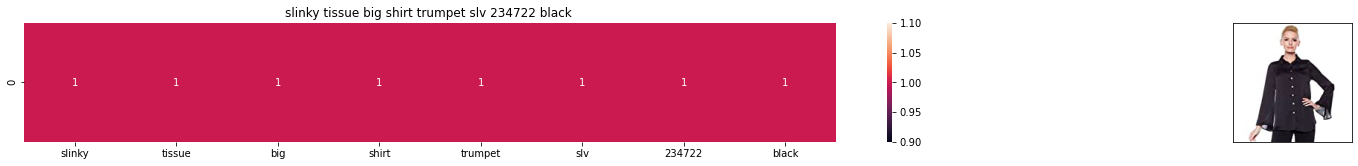

ASIN : B074LX1PSD
Brand: Slinky
Title: slinky tissue big shirt trumpet slv 234722 black 
Euclidean similarity with the query image : 0.0


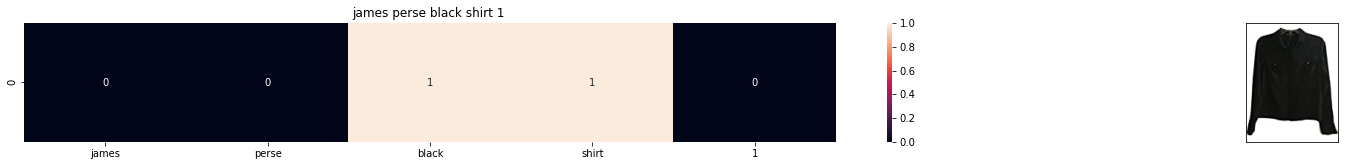

ASIN : B01N8Z2K60
Brand: James Perse
Title: james perse black shirt 1 
Euclidean similarity with the query image : 2.8284271247461903


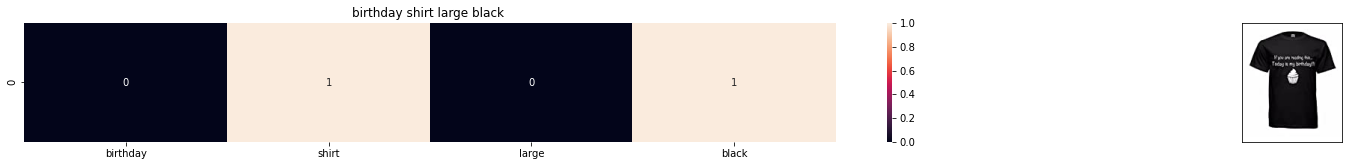

ASIN : B06XQ5V17Z
Brand: Speak Your Piece
Title: birthday shirt large black 
Euclidean similarity with the query image : 2.8284271247461903


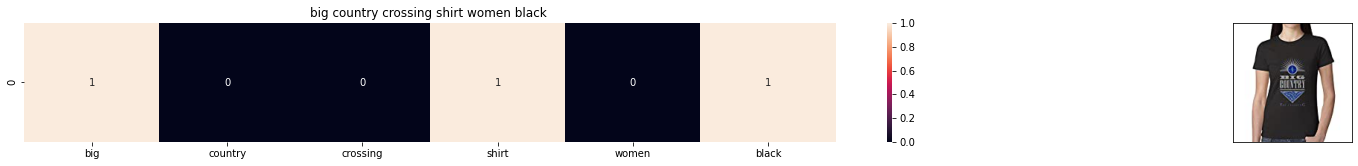

ASIN : B01HEPDCK8
Brand: Tony Arden
Title: big country crossing shirt women black 
Euclidean similarity with the query image : 2.8284271247461903


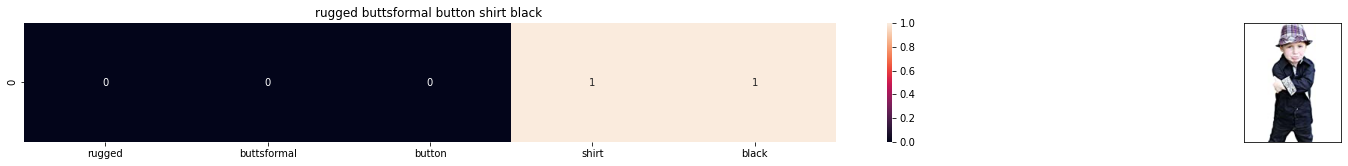

ASIN : B00HDNKYZI
Brand: RuffleButts
Title: rugged buttsformal button shirt black 
Euclidean similarity with the query image : 3.0


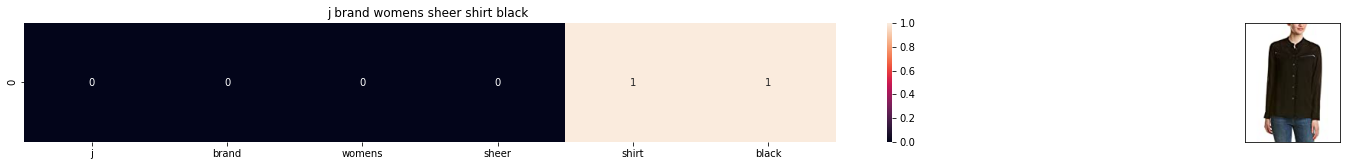

ASIN : B013L1V8PK
Brand: J Brand Jeans
Title: j brand womens sheer shirt black 
Euclidean similarity with the query image : 3.0


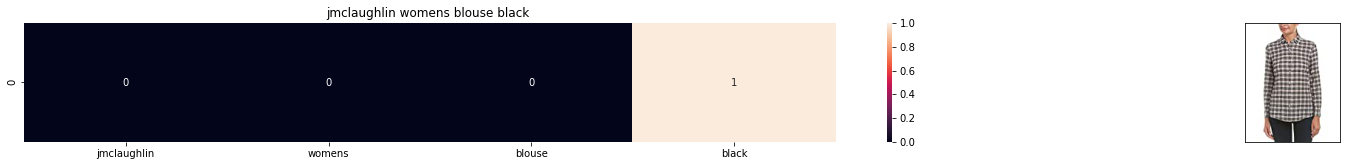

ASIN : B074KN55WS
Brand: J. McLaughlin
Title: jmclaughlin womens blouse black 
Euclidean similarity with the query image : 3.1622776601683795


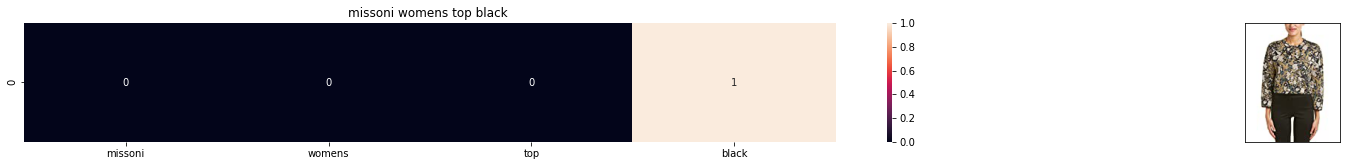

ASIN : B074TSFJHM
Brand: M Missoni
Title: missoni womens top black 
Euclidean similarity with the query image : 3.1622776601683795


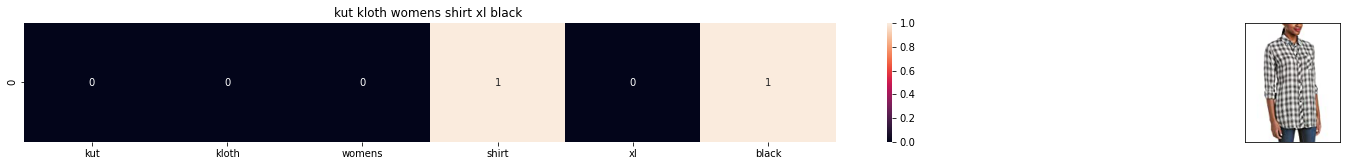

ASIN : B01N63AQUJ
Brand: KUT from the Kloth
Title: kut kloth womens shirt xl black 
Euclidean similarity with the query image : 3.1622776601683795


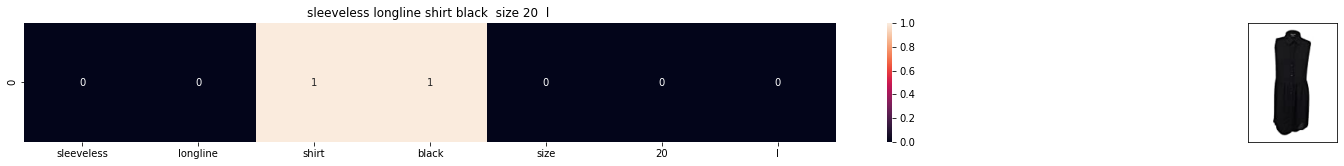

ASIN : B071KCLKXF
Brand: City Chic
Title: sleeveless longline shirt black  size 20  l 
Euclidean similarity with the query image : 3.1622776601683795


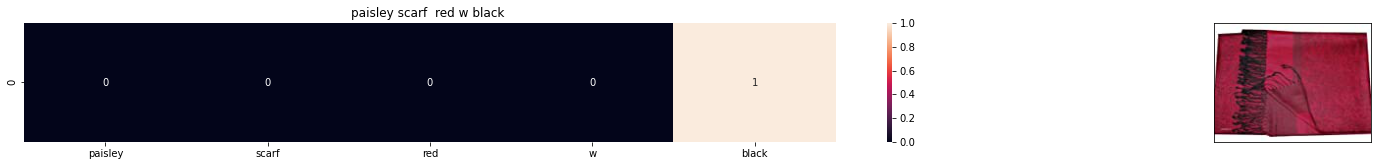

ASIN : B005ZKYK0Q
Brand: Pashmina
Title: paisley scarf  red w black 
Euclidean similarity with the query image : 3.1622776601683795


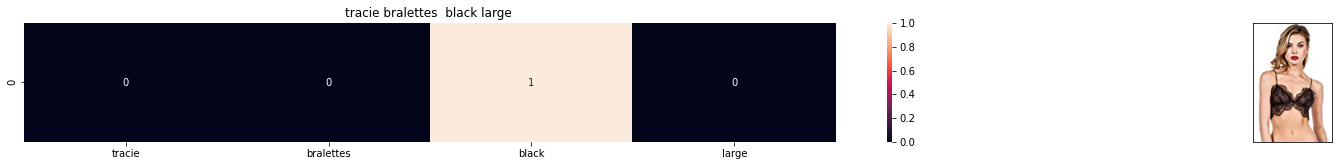

ASIN : B01HT0LKMK
Brand: Lushfox
Title: tracie bralettes  black large 
Euclidean similarity with the query image : 3.1622776601683795


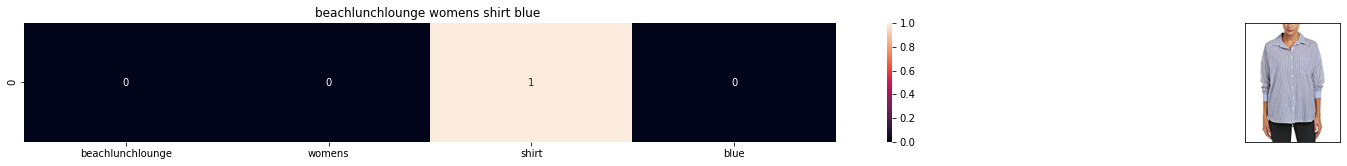

ASIN : B074SZ54KJ
Brand: Beach Lunch Lounge
Title: beachlunchlounge womens shirt blue 
Euclidean similarity with the query image : 3.1622776601683795


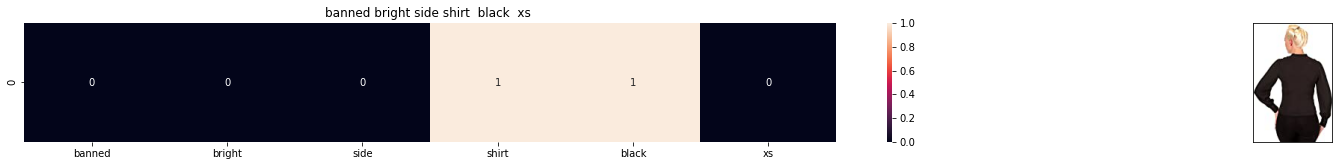

ASIN : B017NU1B6Q
Brand: Banned
Title: banned bright side shirt  black  xs 
Euclidean similarity with the query image : 3.1622776601683795


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x000001C1D0674C20>

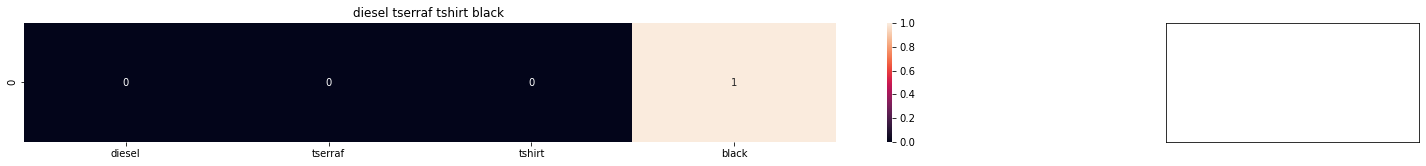

In [24]:
def bag_of_words_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    pairwise_dist = pairwise_distances(title_features,title_features[doc_id])
    
    # np.argsort will return indices of the smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    
    for i in range(0,len(indices)):
        # we will pass 1. doc_id, 2. title1, 3. title2, url, model
        get_result(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'bag_of_words')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print ('Brand:', data['brand'].loc[df_indices[i]])
        print ('Title:', data['title'].loc[df_indices[i]])
        print ('Euclidean similarity with the query image :', pdists[i])
        print('='*60)

#call the bag-of-words model for a product to get similar products.
bag_of_words_model(12566, 20) # change the index if you want to.
# In the output heat map each value represents the count value 
# of the label word, the color represents the intersection 
# with inputs title.

#try 12566
#try 931

## [3.2] TF-IDF based product similarity

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import os

In [26]:
tfidf_title_vectorizer = TfidfVectorizer(min_df = 0)
tfidf_title_features = tfidf_title_vectorizer.fit_transform(data['title'])

In [27]:
# tfidf_title_features.shape = #data_points * #words_in_corpus
# CountVectorizer().fit_transform(courpus) returns the a sparase matrix of dimensions #data_points * #words_in_corpus
# tfidf_title_features[doc_id, index_of_word_in_corpus] = tfidf values of the word in given doc

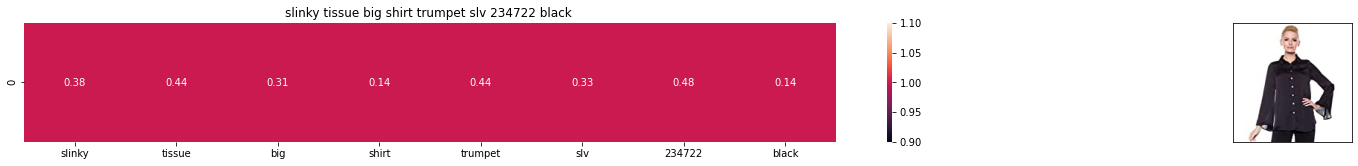

ASIN : B074LX1PSD
BRAND : Slinky
Eucliden distance from the given image : 0.0


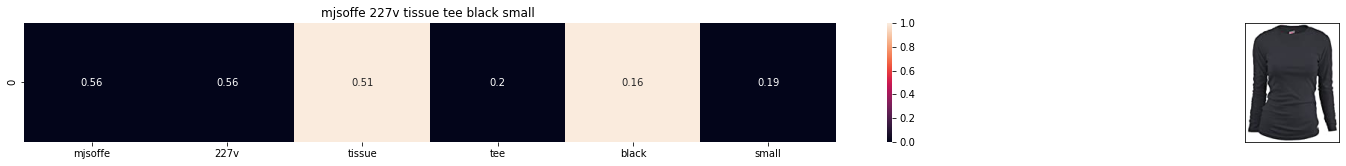

ASIN : B001CEVA7U
BRAND : MJ Soffe
Eucliden distance from the given image : 1.2284393144931256


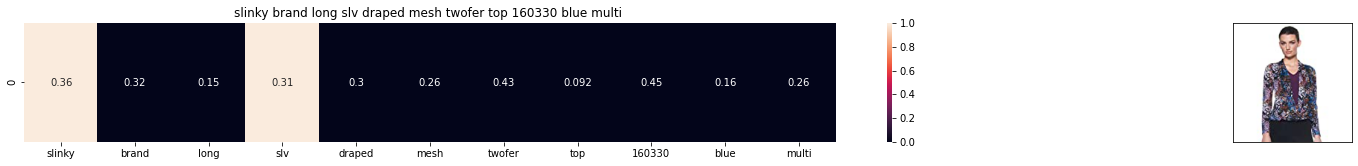

ASIN : B074LQW8H4
BRAND : Slinky
Eucliden distance from the given image : 1.2344456055454602


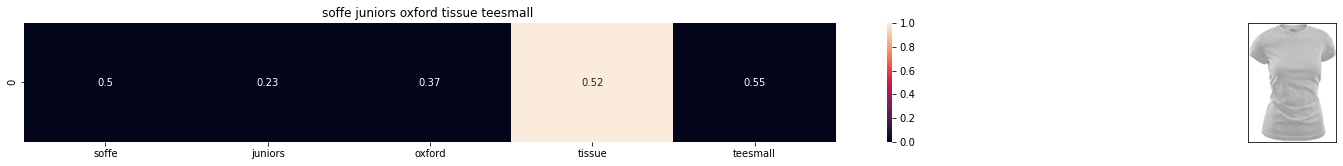

ASIN : B006UHGFA6
BRAND : Soffe
Eucliden distance from the given image : 1.2445250610275658


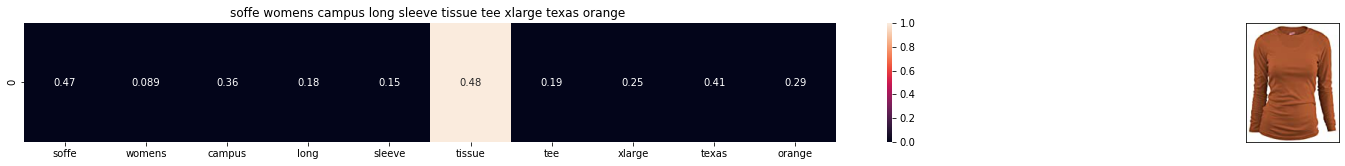

ASIN : B00K4XPY22
BRAND : Soffe
Eucliden distance from the given image : 1.2560921684471076


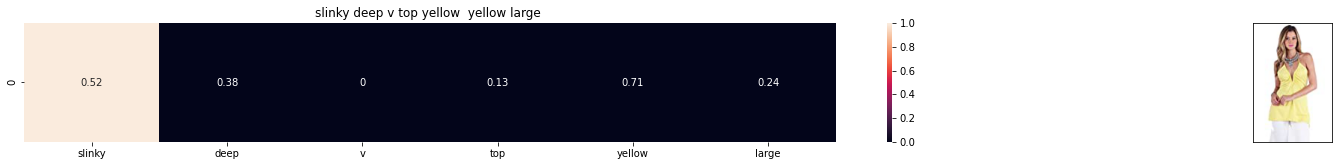

ASIN : B01HT0LM5U
BRAND : Lushfox
Eucliden distance from the given image : 1.2652142453957371


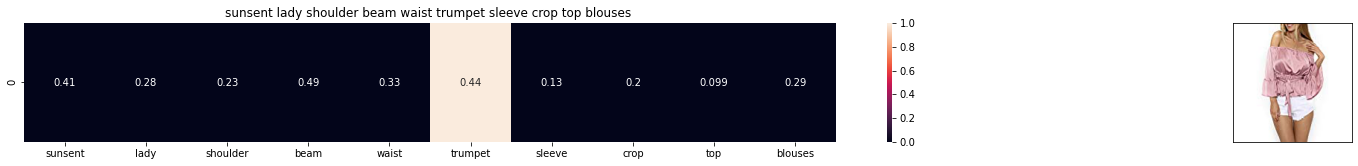

ASIN : B01M2WMXJO
BRAND : Sunsent
Eucliden distance from the given image : 1.2699259506487146


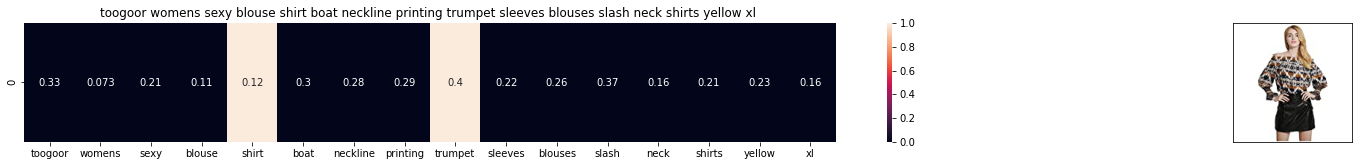

ASIN : B01MZCZC8O
BRAND : TOOGOO(R)
Eucliden distance from the given image : 1.2732485203332689


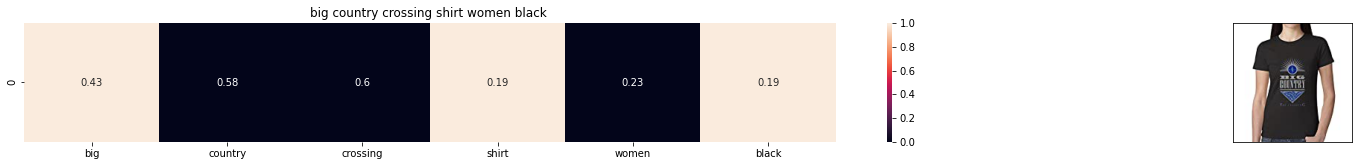

ASIN : B01HEPDCK8
BRAND : Tony Arden
Eucliden distance from the given image : 1.2762529470870894


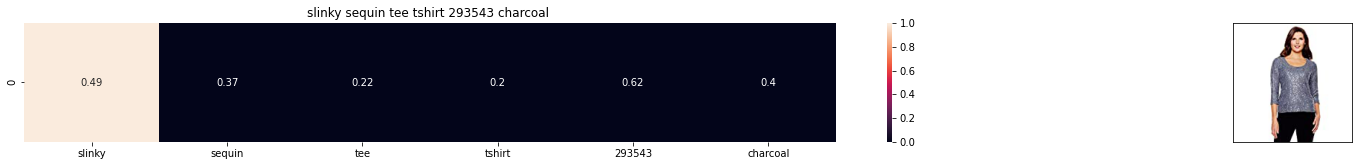

ASIN : B074LVYNB5
BRAND : Slinky
Eucliden distance from the given image : 1.2762674730438566


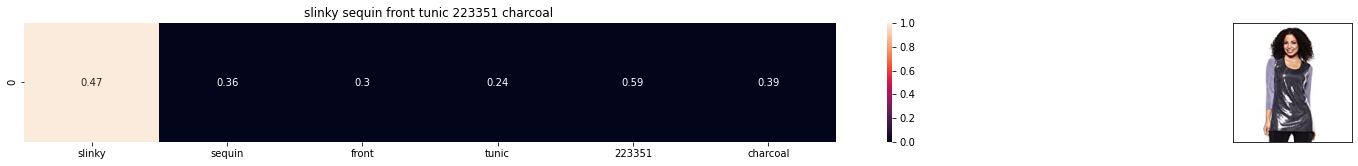

ASIN : B074LVPRJL
BRAND : Slinky
Eucliden distance from the given image : 1.2816021181728123


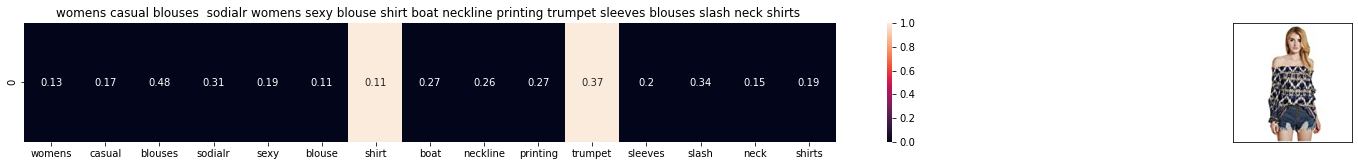

ASIN : B01MZBB7RR
BRAND : SODIAL(R)
Eucliden distance from the given image : 1.2847353134188282


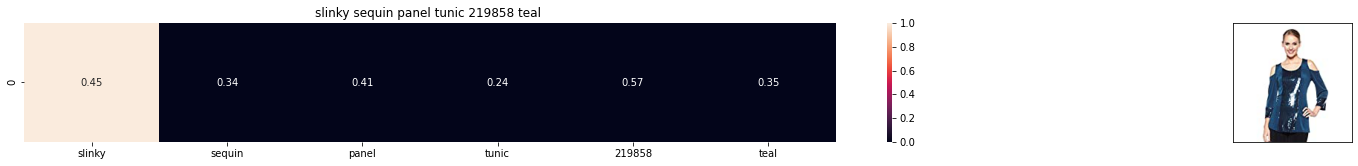

ASIN : B074LX9LDS
BRAND : Slinky
Eucliden distance from the given image : 1.2863762489282244


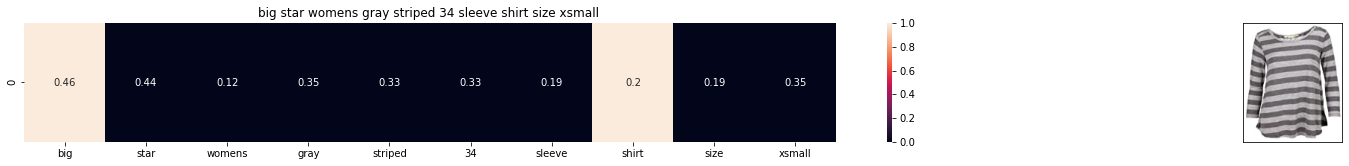

ASIN : B00IMMSVDG
BRAND : Big Star
Eucliden distance from the given image : 1.2871842683534276


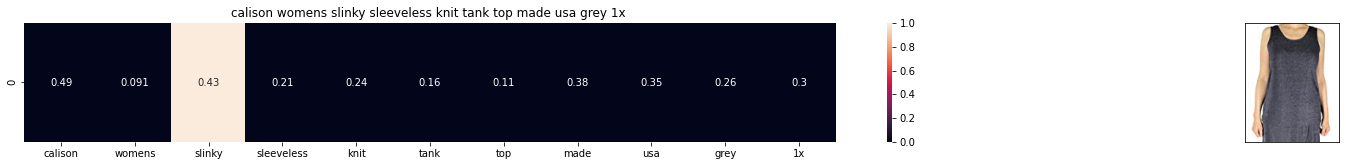

ASIN : B01EFI6YRA
BRAND : Calison
Eucliden distance from the given image : 1.2929805693183456


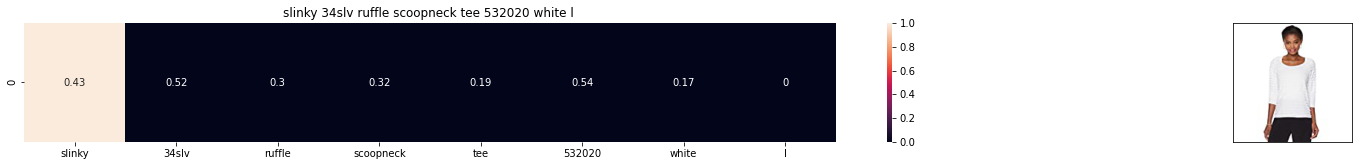

ASIN : B0759W1F8F
BRAND : Slinky
Eucliden distance from the given image : 1.293964435530511


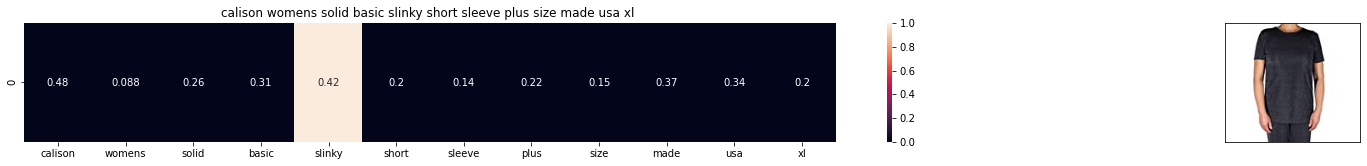

ASIN : B01EFI6D9Y
BRAND : Calison
Eucliden distance from the given image : 1.2964285483280704


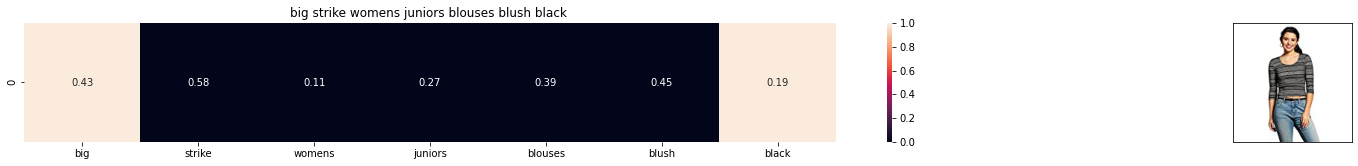

ASIN : B01NBL1AAI
BRAND : Big Strike
Eucliden distance from the given image : 1.2967407520820022


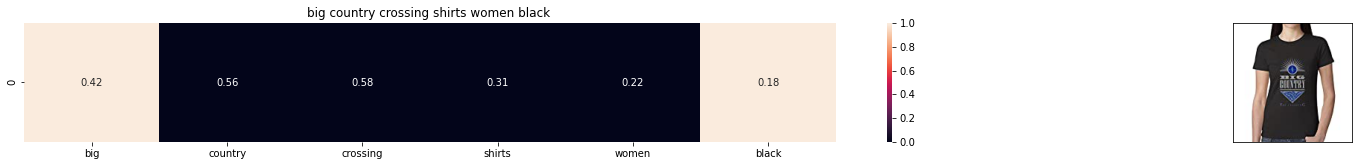

ASIN : B01HEPDD1Q
BRAND : Tony Arden
Eucliden distance from the given image : 1.2997055435249703


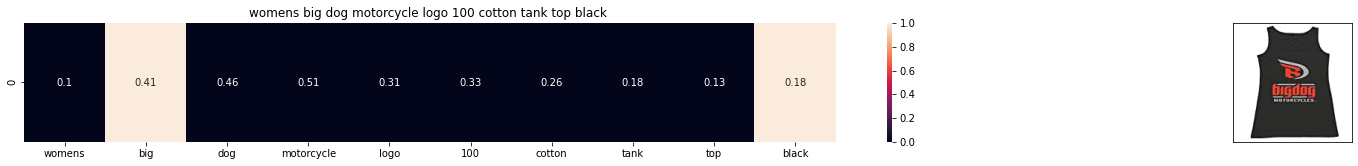

ASIN : B01LGUT2U6
BRAND : Dvigo
Eucliden distance from the given image : 1.3022851297738702


In [28]:
def tfidf_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    pairwise_dist = pairwise_distances(tfidf_title_features,tfidf_title_features[doc_id])

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])

    for i in range(0,len(indices)):
        # we will pass 1. doc_id, 2. title1, 3. title2, url, model
        get_result(indices[i], data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'tfidf')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('BRAND :',data['brand'].loc[df_indices[i]])
        print ('Eucliden distance from the given image :', pdists[i])
        print('='*125)
tfidf_model(12566, 20)
# in the output heat map each value represents the tfidf values of the label word, the color represents the intersection with inputs title

## [3.2] IDF based product similarity

In [29]:
idf_title_vectorizer = CountVectorizer()
idf_title_features = idf_title_vectorizer.fit_transform(data['title'])

In [30]:
# idf_title_features.shape = #data_points * #words_in_corpus
# CountVectorizer().fit_transform(courpus) returns the a sparase matrix of dimensions #data_points * #words_in_corpus
# idf_title_features[doc_id, index_of_word_in_corpus] = number of times the word occured in that doc

In [31]:
def n_containing(word):
    # return the number of documents which had the given word
    return sum(1 for blob in data['title'] if word in blob.split())

def idf(word):
    # idf = log(#number of docs / #number of docs which had the given word)
    return math.log(data.shape[0] / (n_containing(word)))

In [32]:
import math

In [33]:
# we need to convert the values into float
idf_title_features  = idf_title_features.astype(np.float)

for i in idf_title_vectorizer.vocabulary_.keys():
    # for every word in whole corpus we will find its idf value
    idf_val = idf(i)
    
    # to calculate idf_title_features we need to replace the count values with the idf values of the word
    # idf_title_features[:, idf_title_vectorizer.vocabulary_[i]].nonzero()[0] will return all documents in which the word i present
    for j in idf_title_features[:, idf_title_vectorizer.vocabulary_[i]].nonzero()[0]:
        
        # we replace the count values of word i in document j with  idf_value of word i 
        # idf_title_features[doc_id, index_of_word_in_courpus] = idf value of word
        idf_title_features[j,idf_title_vectorizer.vocabulary_[i]] = idf_val

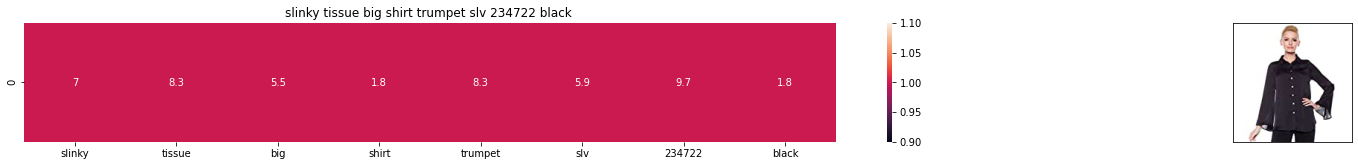

ASIN : B074LX1PSD
Brand : Slinky
euclidean distance from the given image : 0.0


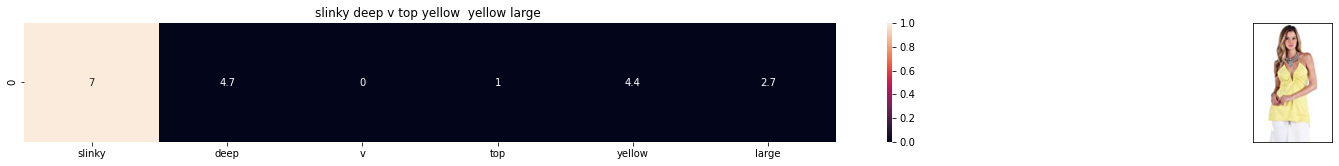

ASIN : B01HT0LM5U
Brand : Lushfox
euclidean distance from the given image : 18.815558505333353


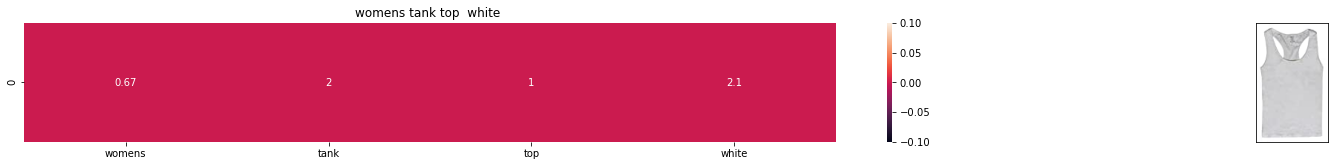

ASIN : B00JPOZ9GM
Brand : Sofra
euclidean distance from the given image : 19.056153135116983


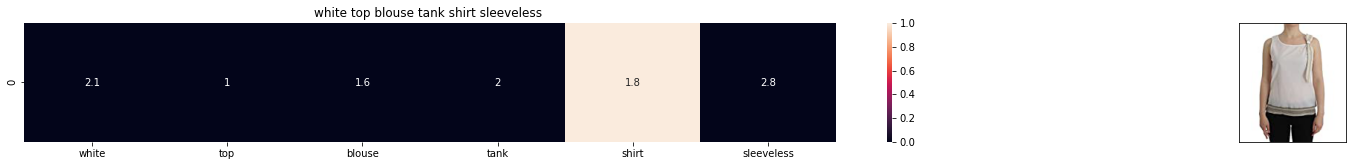

ASIN : B074G5G5RK
Brand : ERMANNO SCERVINO
euclidean distance from the given image : 19.233574080852748


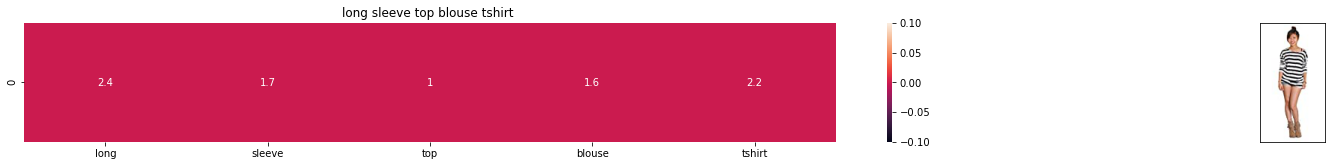

ASIN : B00KF2N5PU
Brand : Vietsbay
euclidean distance from the given image : 19.25447079280887


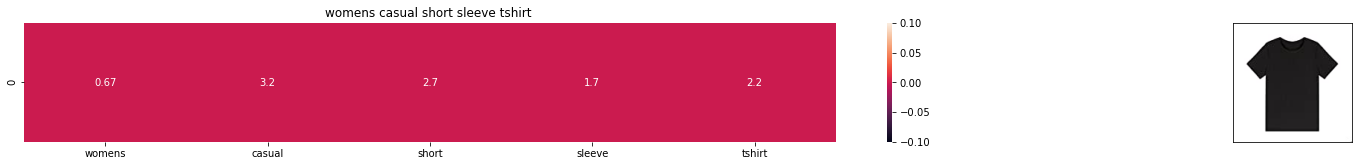

ASIN : B074T9KG9Q
Brand : Rain
euclidean distance from the given image : 19.471984287581588


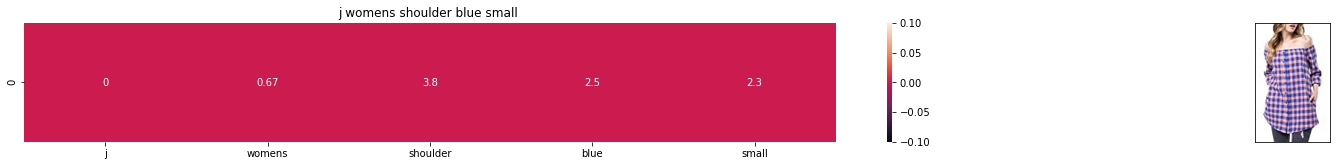

ASIN : B07583CQFT
Brand : Very J
euclidean distance from the given image : 19.491589268219165


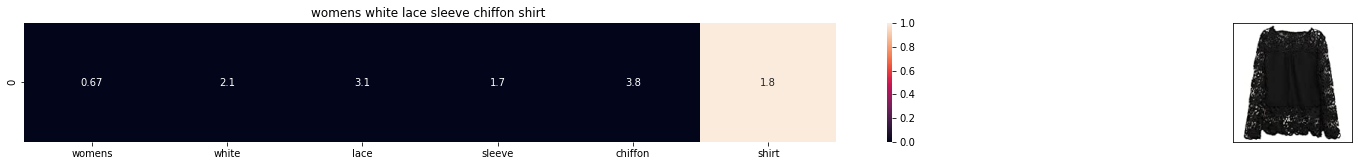

ASIN : B00XPU33FQ
Brand : Fuming
euclidean distance from the given image : 19.546707475626565


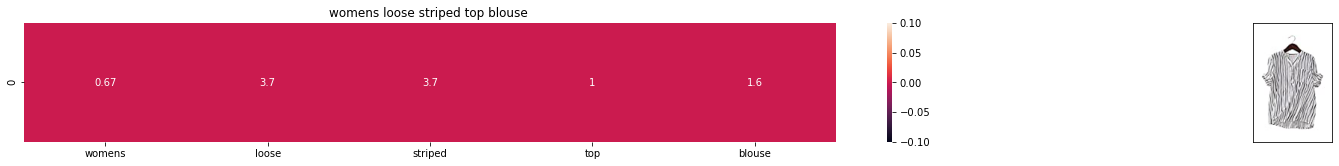

ASIN : B00ZZMYBRG
Brand : HP-LEISURE
euclidean distance from the given image : 19.623629295041326


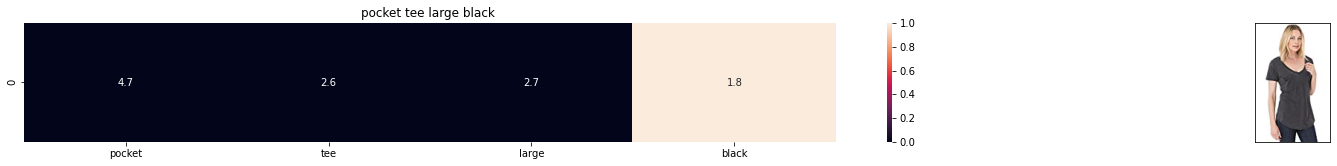

ASIN : B017I2YWUQ
Brand : Z SUPPLY
euclidean distance from the given image : 19.6509690957612


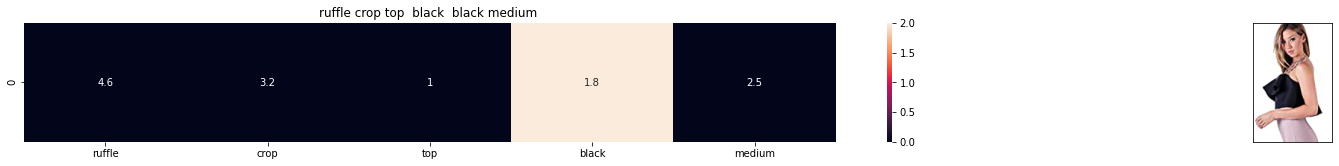

ASIN : B01HT0OL3K
Brand : Lushfox
euclidean distance from the given image : 19.71652324129732


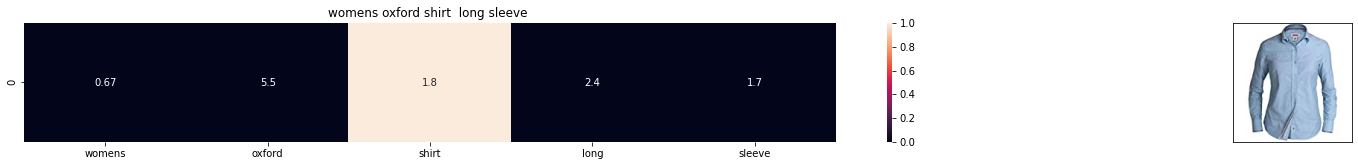

ASIN : B01577JZOC
Brand : Boast
euclidean distance from the given image : 19.727653092145495


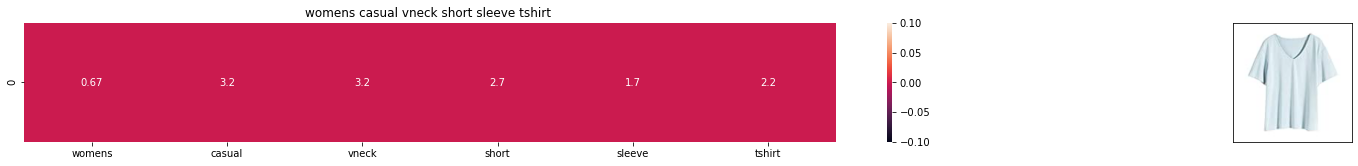

ASIN : B074V45DCX
Brand : Rain
euclidean distance from the given image : 19.73783212810931


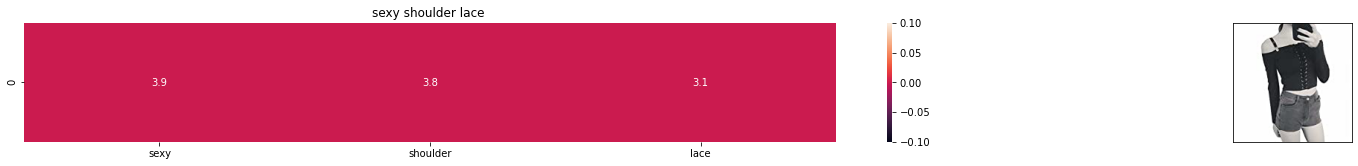

ASIN : B01JVWUB3S
Brand : bylexie
euclidean distance from the given image : 19.806655362176855


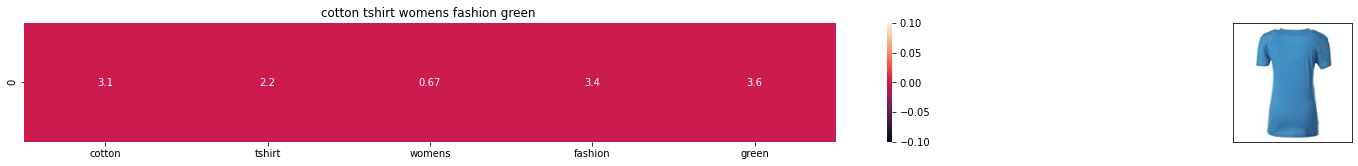

ASIN : B073GJGVBN
Brand : Ivan Levi
euclidean distance from the given image : 19.81775184940861


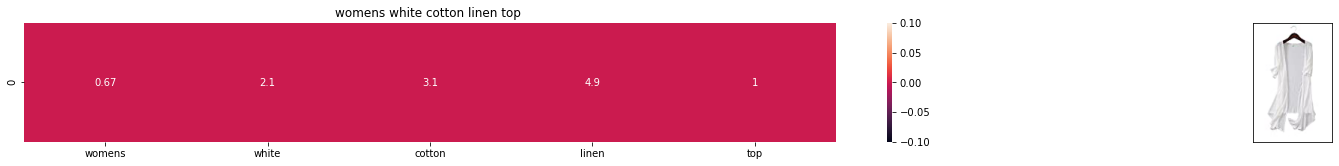

ASIN : B00ZZPR4Y0
Brand : HP-LEISURE
euclidean distance from the given image : 19.817775558907996


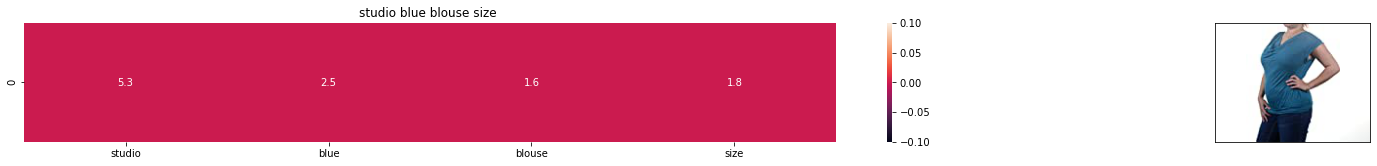

ASIN : B016P80OKQ
Brand : Studio M
euclidean distance from the given image : 19.82434041539698


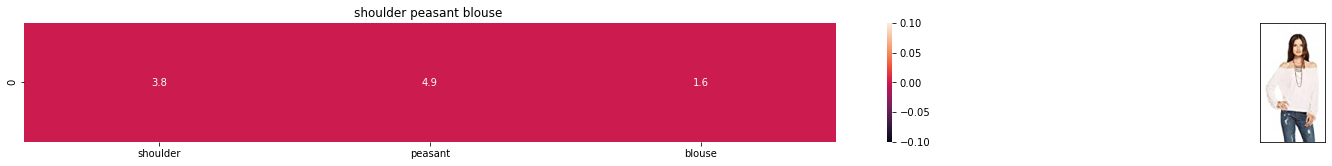

ASIN : B01E1QD5PK
Brand : CHASER
euclidean distance from the given image : 19.85364518589162


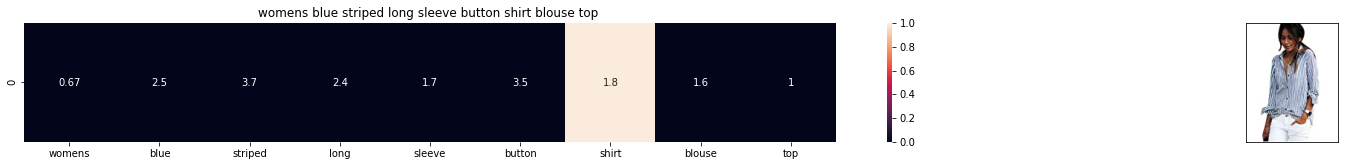

ASIN : B01KM2OLIW
Brand : Voguegirl
euclidean distance from the given image : 19.87051140253544


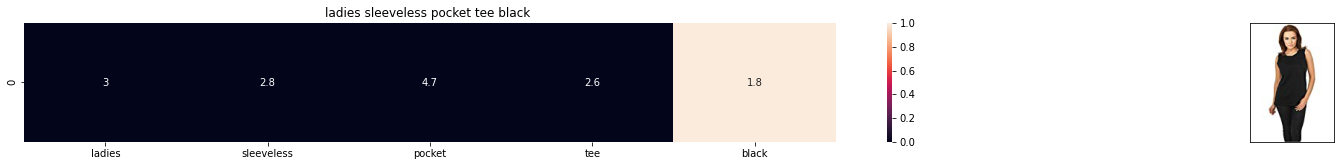

ASIN : B01GG0SZ0Y
Brand : Urban Classics
euclidean distance from the given image : 19.89051234119018


In [27]:
def idf_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    pairwise_dist = pairwise_distances(idf_title_features,idf_title_features[doc_id])

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])

    for i in range(0,len(indices)):
        get_result(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'idf')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('Brand :',data['brand'].loc[df_indices[i]])
        print ('euclidean distance from the given image :', pdists[i])
        print('='*125)

        
        
idf_model(12566,20)
# in the output heat map each value represents the idf values of the label word, the color represents the intersection with inputs title

# [4] Text Semantics based product similarity

In [34]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

# in this project we are using a pretrained model by google
# its 3.3G file, once you load this into your memory 
# it occupies ~9Gb, so please do this step only if you have >12G of ram
# we will provide a pickle file wich contains a dict , 
# and it contains all our courpus words as keys and  model[word] as values
# To use this code-snippet, download "GoogleNews-vectors-negative300.bin" 
# from https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit
# it's 1.9GB in size.

'''
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
'''
path = "models/word2vec.model" 
#if you do NOT have RAM >= 12GB, use the code below.
with open('word2vec_model', 'rb') as handle:
    model = pickle.load(handle)


In [35]:
# Utility functions

def get_word_vec(sentence, doc_id, m_name):
    # sentence : title of the apparel
    # doc_id: document id in our corpus
    # m_name: model information it will take two values
        # if  m_name == 'avg', we will append the model[i], w2v representation of word i
        # if m_name == 'weighted', we will multiply each w2v[word] with the idf(word)
    vec = []
    for i in sentence.split():
        if i in vocab:
            if m_name == 'weighted' and i in  idf_title_vectorizer.vocabulary_:
                vec.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[i]] * model[i])
            elif m_name == 'avg':
                vec.append(model[i])
        else:
            # if the word in our courpus is not there in the google word2vec corpus, we are just ignoring it
            vec.append(np.zeros(shape=(300,)))
    # we will return a numpy array of shape (#number of words in title * 300 ) 300 = len(w2v_model[word])
    # each row represents the word2vec representation of each word (weighted/avg) in given sentance 
    return  np.array(vec)

def get_distance(vec1, vec2):
    # vec1 = np.array(#number_of_words_title1 * 300), each row is a vector of length 300 corresponds to each word in give title
    # vec2 = np.array(#number_of_words_title2 * 300), each row is a vector of length 300 corresponds to each word in give title
    
    final_dist = []
    # for each vector in vec1 we caluclate the distance(euclidean) to all vectors in vec2
    for i in vec1:
        dist = []
        for j in vec2:
            # np.linalg.norm(i-j) will result the euclidean distance between vectors i, j
            dist.append(np.linalg.norm(i-j))
        final_dist.append(np.array(dist))
    # final_dist = np.array(#number of words in title1 * #number of words in title2)
    # final_dist[i,j] = euclidean distance between vectors i, j
    return np.array(final_dist)


def heat_map_w2v(sentence1, sentence2, url, doc_id1, doc_id2, model):
    # sentance1 : title1, input apparel
    # sentance2 : title2, recommended apparel
    # url: apparel image url
    # doc_id1: document id of input apparel
    # doc_id2: document id of recommended apparel
    # model: it can have two values, 1. avg 2. weighted
    
    #s1_vec = np.array(#number_of_words_title1 * 300), each row is a vector(weighted/avg) of length 300 corresponds to each word in give title
    s1_vec = get_word_vec(sentence1, doc_id1, model)
    #s2_vec = np.array(#number_of_words_title1 * 300), each row is a vector(weighted/avg) of length 300 corresponds to each word in give title
    s2_vec = get_word_vec(sentence2, doc_id2, model)

    # s1_s2_dist = np.array(#number of words in title1 * #number of words in title2)
    # s1_s2_dist[i,j] = euclidean distance between words i, j
    s1_s2_dist = get_distance(s1_vec, s2_vec)

    
    
    # devide whole figure into 2 parts 1st part displays heatmap 2nd part displays image of apparel
    gs = gridspec.GridSpec(2, 2, width_ratios=[4,1],height_ratios=[2,1]) 
    fig = plt.figure(figsize=(15,15))
    
    ax = plt.subplot(gs[0])
    # ploting the heap map based on the pairwise distances
    ax = sns.heatmap(np.round(s1_s2_dist,4), annot=True)
    # set the x axis labels as recommended apparels title
    ax.set_xticklabels(sentence2.split())
    # set the y axis labels as input apparels title
    ax.set_yticklabels(sentence1.split())
    # set title as recommended apparels title
    ax.set_title(sentence2)
    
    ax = plt.subplot(gs[1])
    # we remove all grids and axis labels for image
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    display_img(url, ax, fig)
    
    plt.show()

In [36]:
# vocab = stores all the words that are there in google w2v model
# vocab = model.wv.vocab.keys() # if you are using Google word2Vec

vocab = model.keys()
# this function will add the vectors of each word and returns the avg vector of given sentance
def build_avg_vec(sentence, num_features, doc_id, m_name):
    # sentace: its title of the apparel
    # num_features: the lenght of word2vec vector, its values = 300
    # m_name: model information it will take two values
        # if  m_name == 'avg', we will append the model[i], w2v representation of word i
        # if m_name == 'weighted', we will multiply each w2v[word] with the idf(word)

    featureVec = np.zeros((num_features,), dtype="float32")
    # we will intialize a vector of size 300 with all zeros
    # we add each word2vec(wordi) to this fetureVec
    nwords = 0
    
    for word in sentence.split():
        nwords += 1
        if word in vocab:
            if m_name == 'weighted' and word in  idf_title_vectorizer.vocabulary_:
                featureVec = np.add(featureVec, idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[word]] * model[word])
            elif m_name == 'avg':
                featureVec = np.add(featureVec, model[word])
    if(nwords>0):
        featureVec = np.divide(featureVec, nwords)
    # returns the avg vector of given sentance, its of shape (1, 300)
    return featureVec

## [4.1] Average Word2Vec product similarity

In [37]:
doc_id = 0
w2v_title = []
# for every title we build a avg vector representation
for i in data['title']:
    w2v_title.append(build_avg_vec(i, 300, doc_id,'avg'))
    doc_id += 1

# w2v_title = np.array(# number of doc in courpus * 300), each row corresponds to a doc 
w2v_title = np.array(w2v_title)

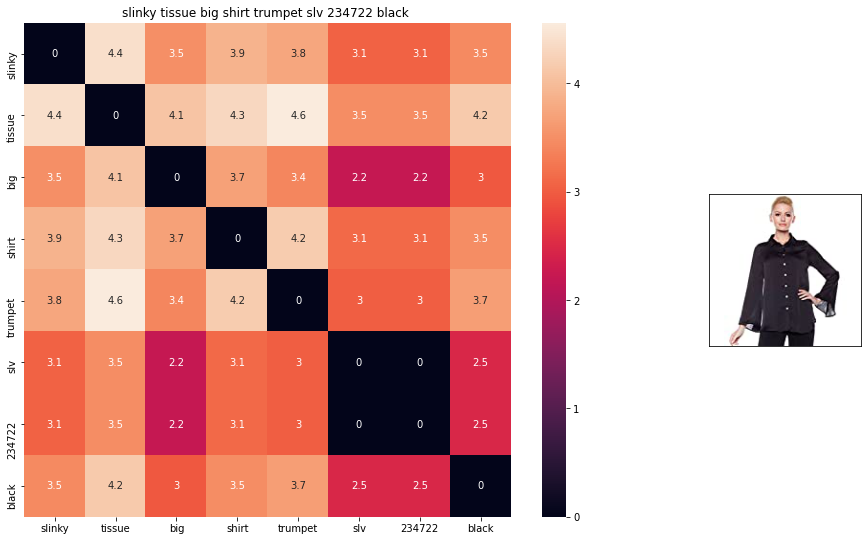

ASIN : B074LX1PSD
BRAND : Slinky
euclidean distance from given input image : 0.0


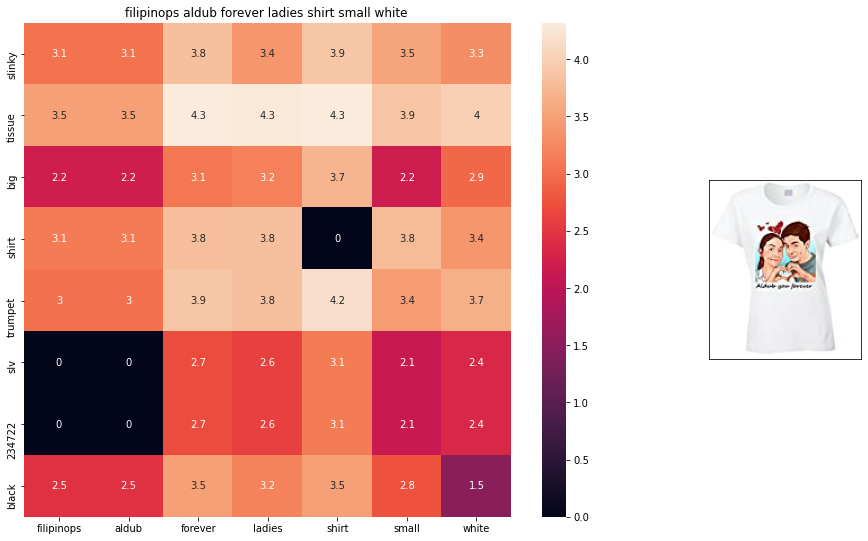

ASIN : B018MQHYJI
BRAND : Alstyle Apparel
euclidean distance from given input image : 0.85612863


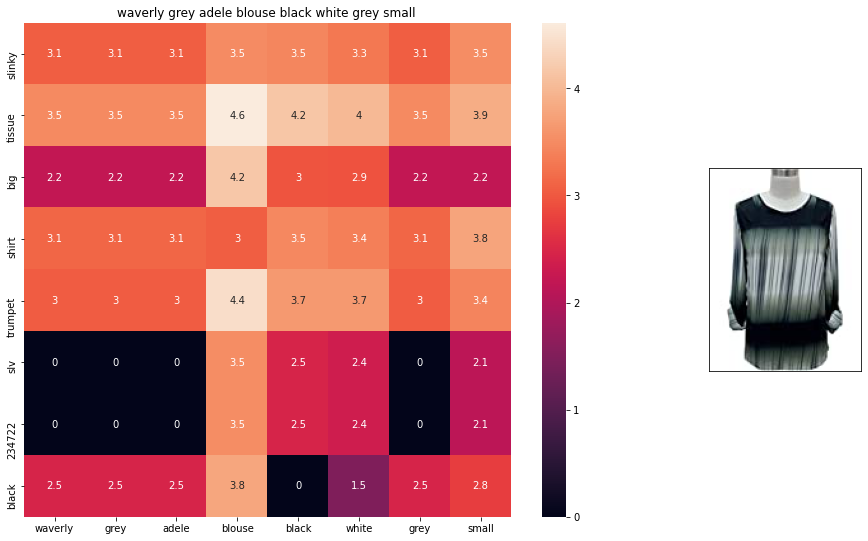

ASIN : B010C3ATDW
BRAND : Waverly Grey
euclidean distance from given input image : 0.85751605


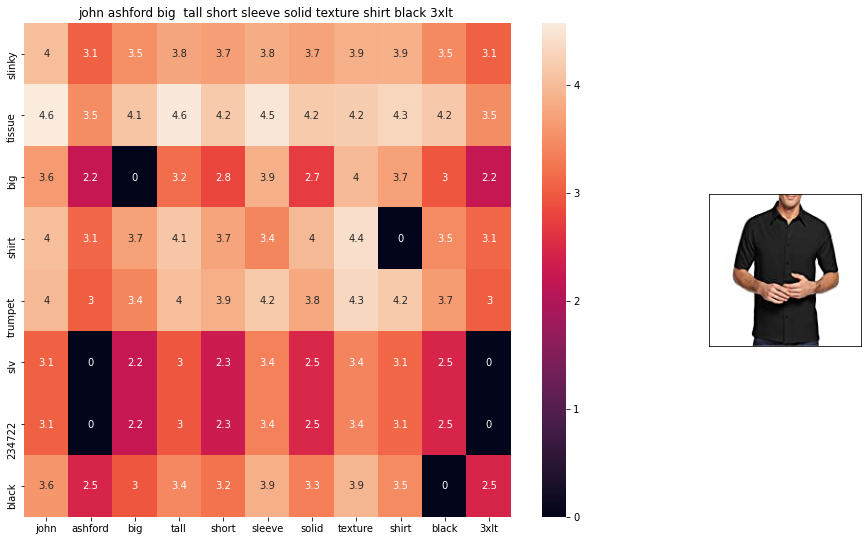

ASIN : B00X821FTW
BRAND : John Ashford
euclidean distance from given input image : 0.8607598


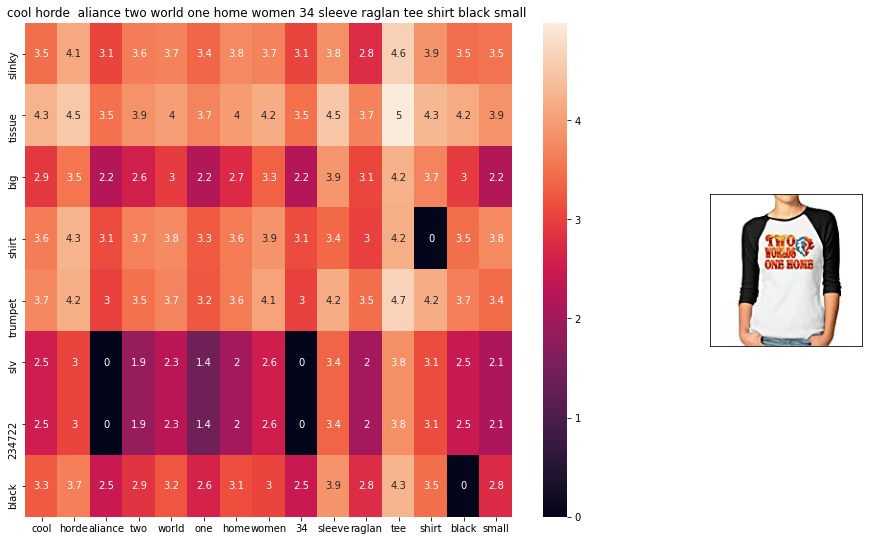

ASIN : B01GKSTZ88
BRAND : Gabriel Platt
euclidean distance from given input image : 0.87317926


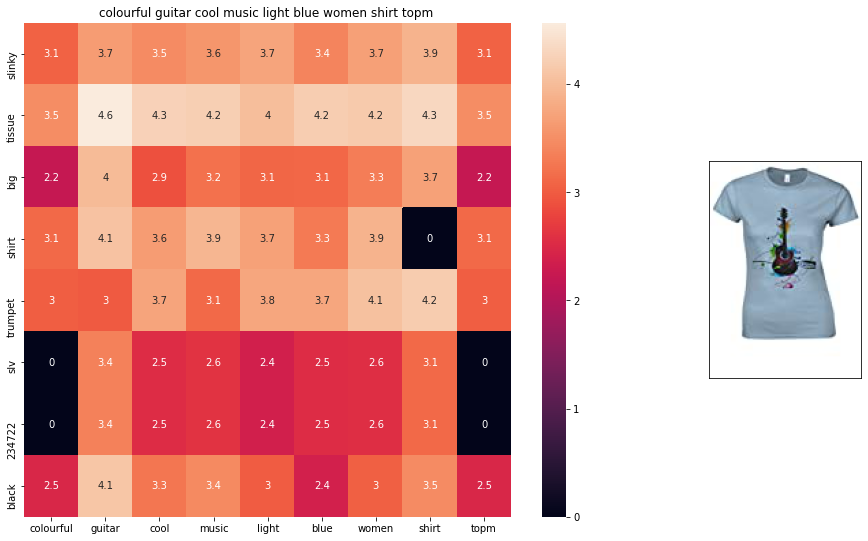

ASIN : B01KS9H0LE
BRAND : NisabellaLTD
euclidean distance from given input image : 0.87377185


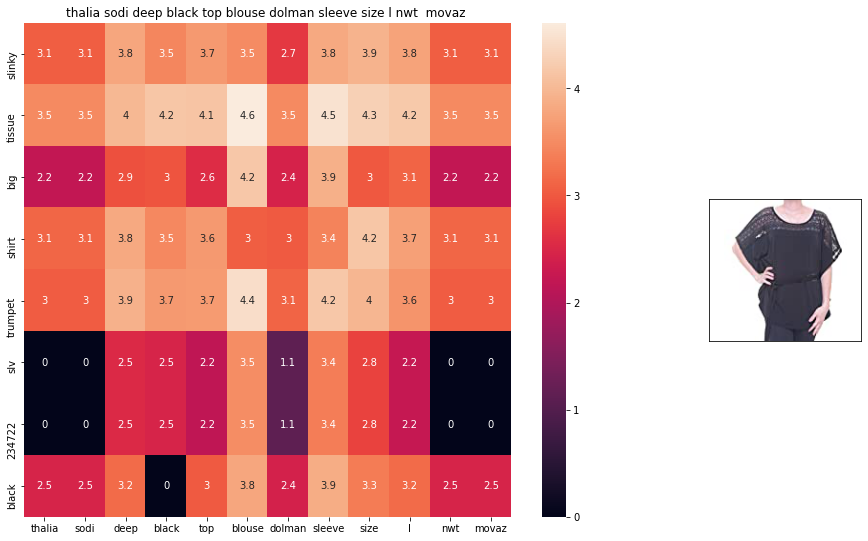

ASIN : B073X679XL
BRAND : Thalia
euclidean distance from given input image : 0.8744637


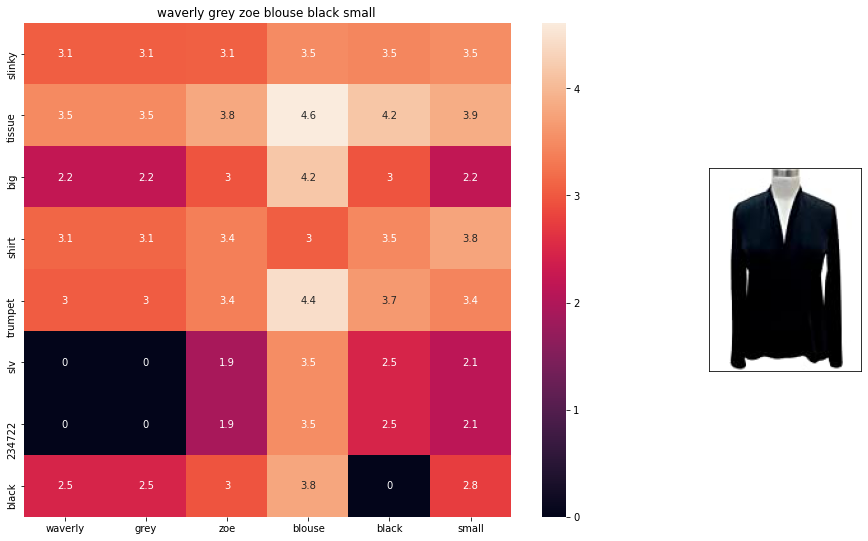

ASIN : B0108LUKQE
BRAND : Waverly Grey
euclidean distance from given input image : 0.87611157


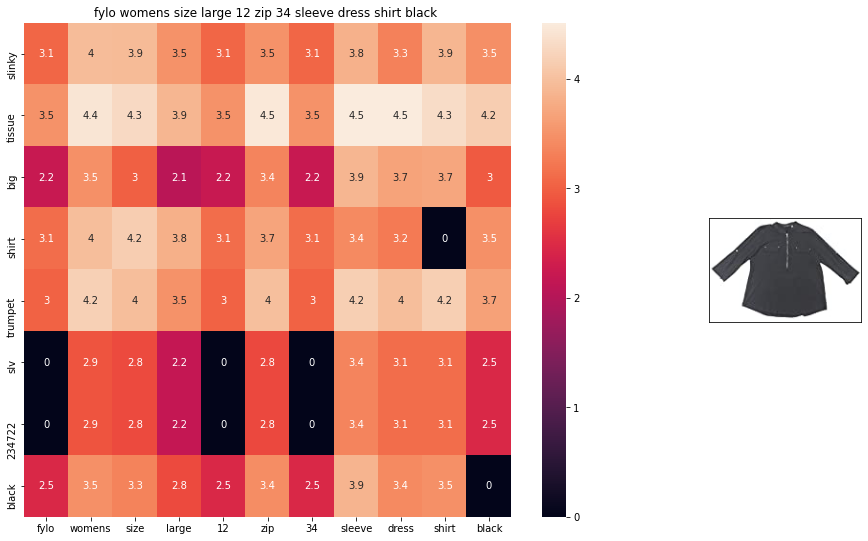

ASIN : B0718Y9J4M
BRAND : f
euclidean distance from given input image : 0.8802383


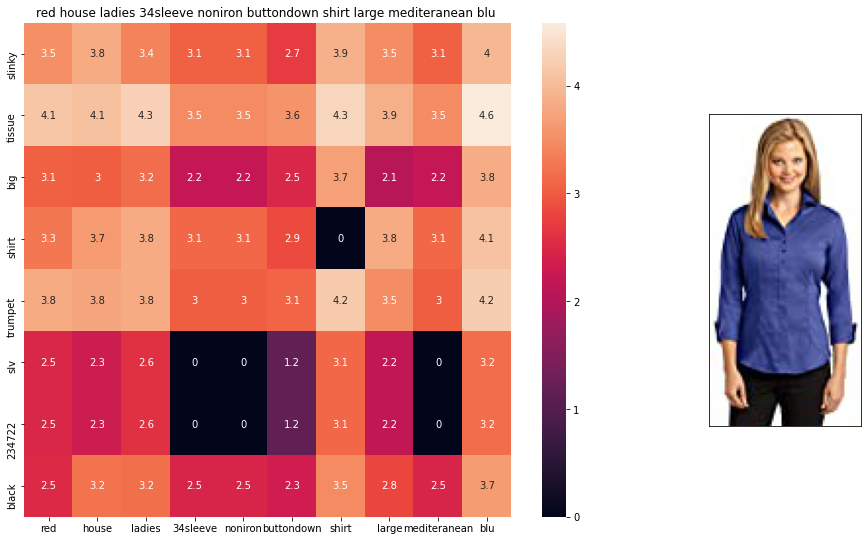

ASIN : B00ZQ6F3R8
BRAND : Red House
euclidean distance from given input image : 0.8835355


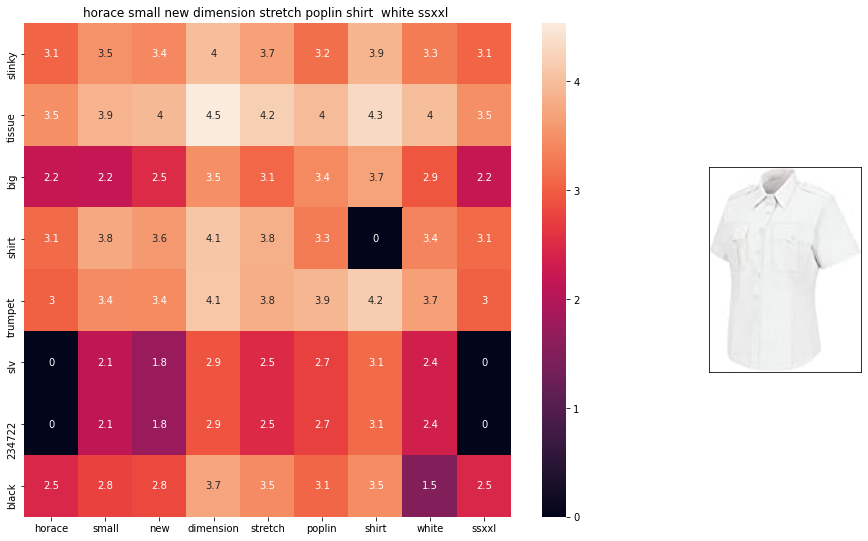

ASIN : B00CJVOYKA
BRAND : Horace Small
euclidean distance from given input image : 0.88372594


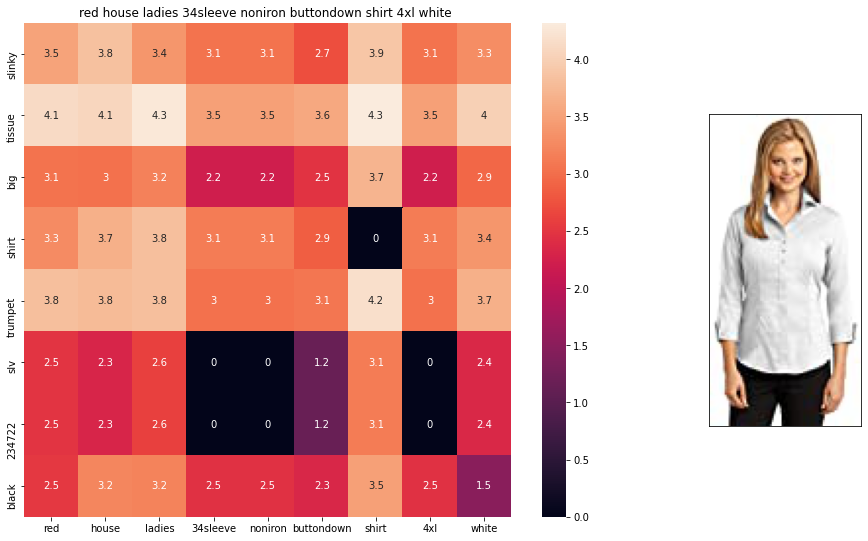

ASIN : B00ZQ6EVDU
BRAND : Red House
euclidean distance from given input image : 0.8841109


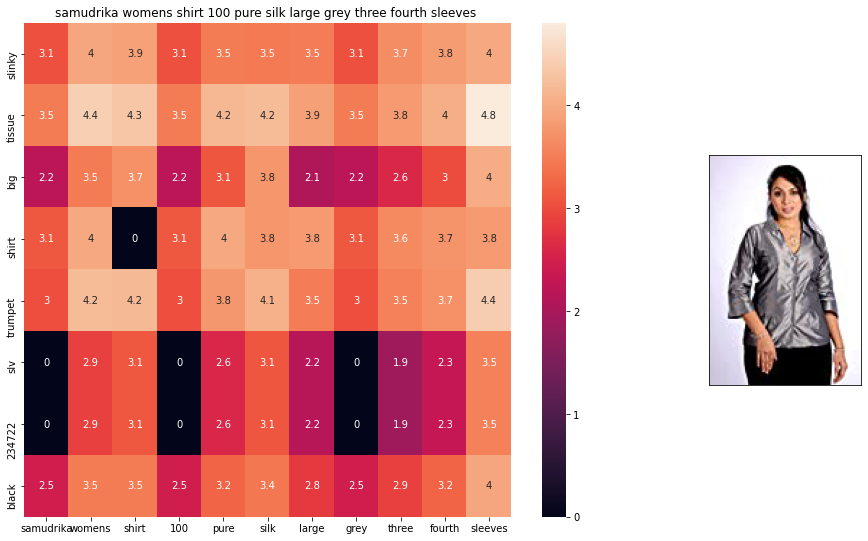

ASIN : B019EU04PM
BRAND : Samudrika
euclidean distance from given input image : 0.88420224


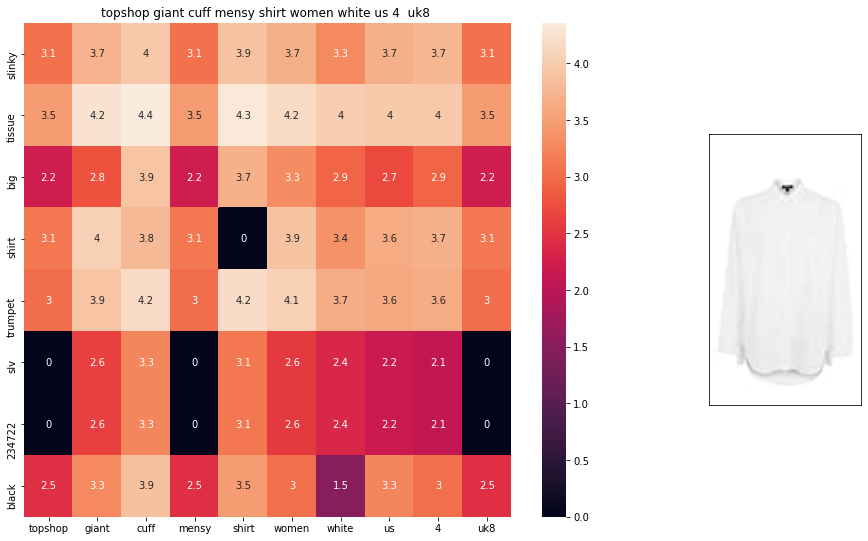

ASIN : B07538JKWD
BRAND : Top Shop
euclidean distance from given input image : 0.88495445


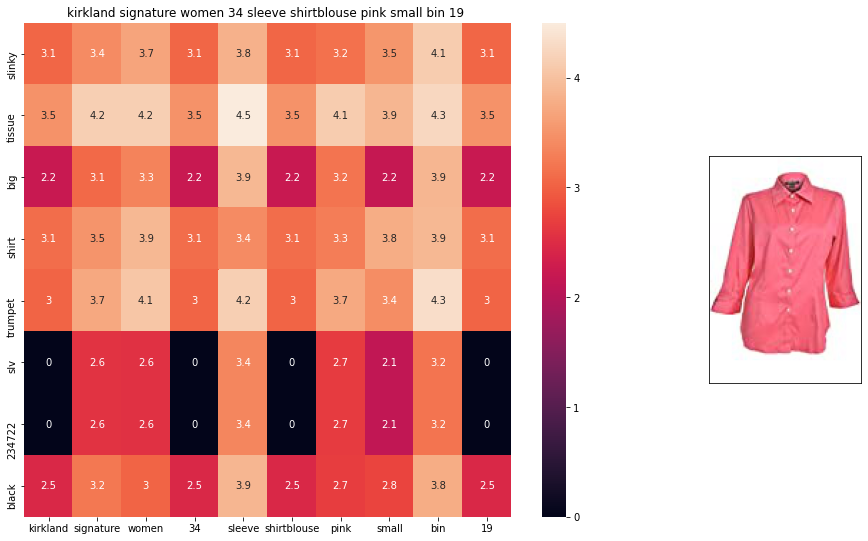

ASIN : B011LPIVR6
BRAND : Kirkland Signature
euclidean distance from given input image : 0.8865038


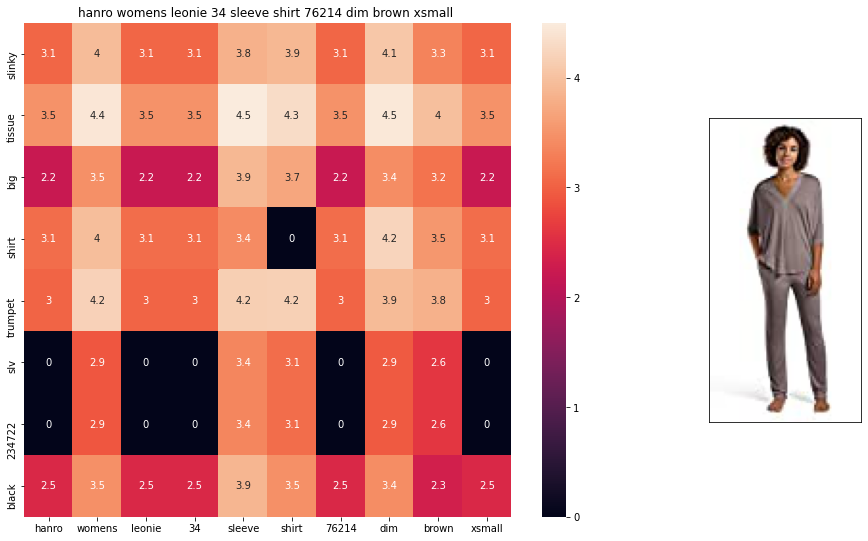

ASIN : B06Y3YRLP1
BRAND : HANRO
euclidean distance from given input image : 0.8880596


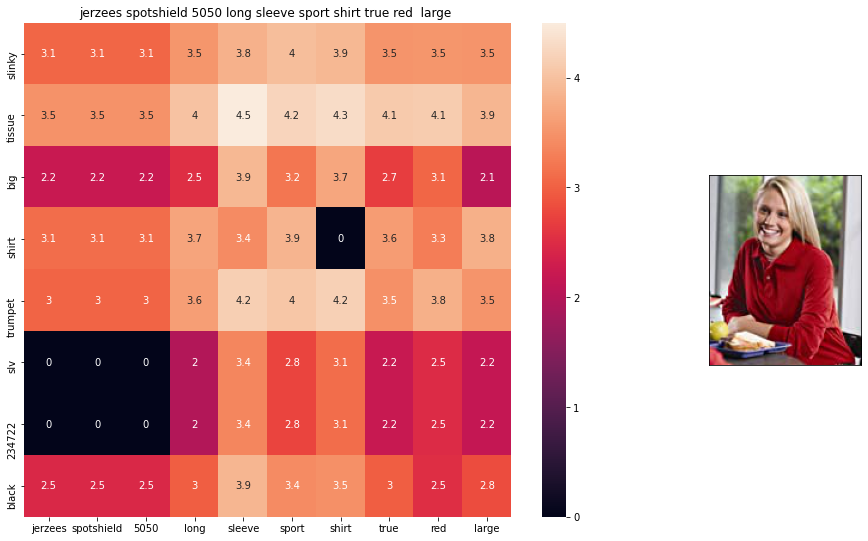

ASIN : B003BSL016
BRAND : Jerzees
euclidean distance from given input image : 0.8895967


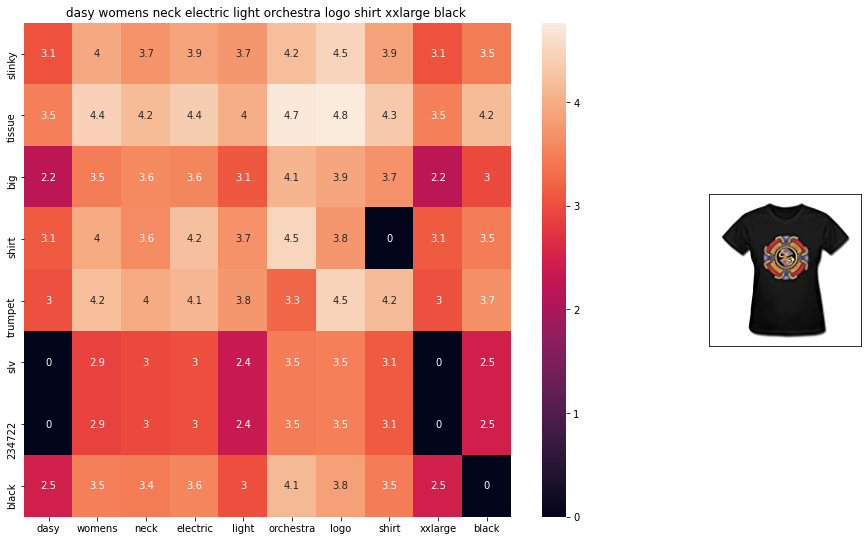

ASIN : B016EXUZC4
BRAND : Dasy
euclidean distance from given input image : 0.8897228


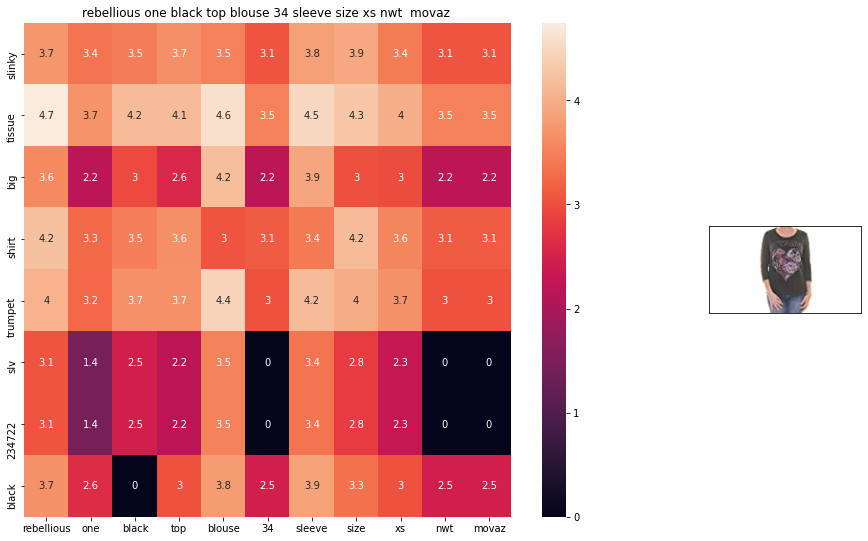

ASIN : B01M0AFTK9
BRAND : Rebellious One
euclidean distance from given input image : 0.892887


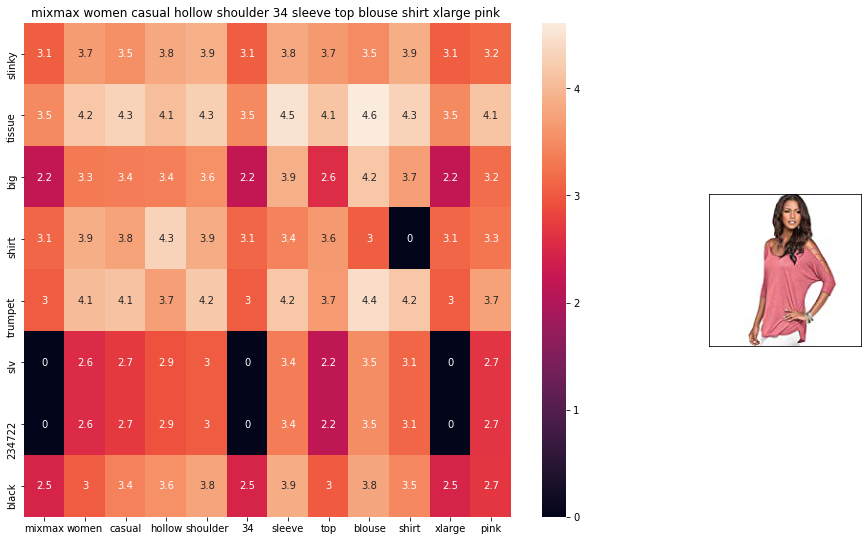

ASIN : B01CA1MOUK
BRAND : Mixmax
euclidean distance from given input image : 0.8932646


In [39]:
def avg_w2v_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # dist(x, y) = sqrt(dot(x, x) - 2 * dot(x, y) + dot(y, y))
    pairwise_dist = pairwise_distances(w2v_title, w2v_title[doc_id].reshape(1,-1))

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    
    for i in range(0, len(indices)):
        heat_map_w2v(data['title'].loc[df_indices[0]],data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], indices[0], indices[i], 'avg')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('BRAND :',data['brand'].loc[df_indices[i]])
        print ('euclidean distance from given input image :', pdists[i])
        print('='*125)

        
avg_w2v_model(12566, 20)
# in the give heat map, each cell contains the euclidean distance between words i, j

### [4.2] IDF weighted Word2Vec for product similarity

In [40]:
doc_id = 0
w2v_title_weight = []
# for every title we build a weighted vector representation
for i in data['title']:
    w2v_title_weight.append(build_avg_vec(i, 300, doc_id,'weighted'))
    doc_id += 1
# w2v_title = np.array(# number of doc in courpus * 300), each row corresponds to a doc 
w2v_title_weight = np.array(w2v_title_weight)

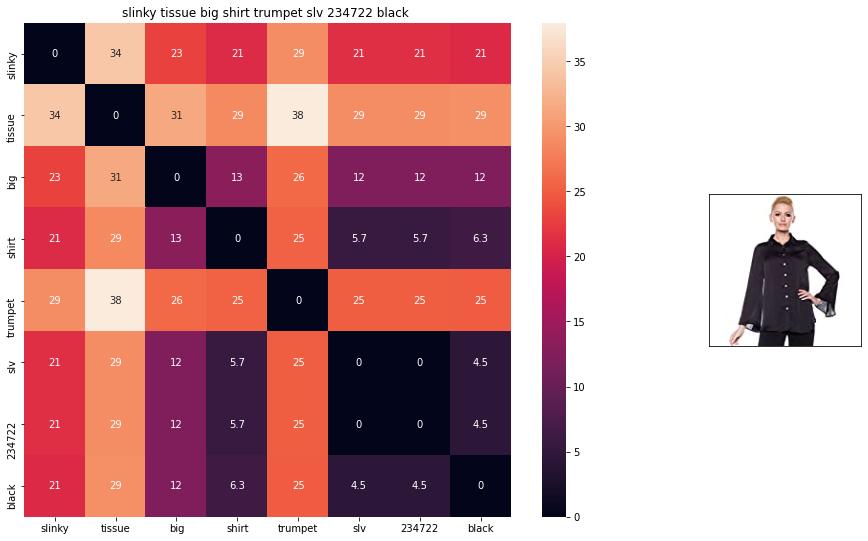

ASIN : B074LX1PSD
Brand : Slinky
euclidean distance from input : 0.0


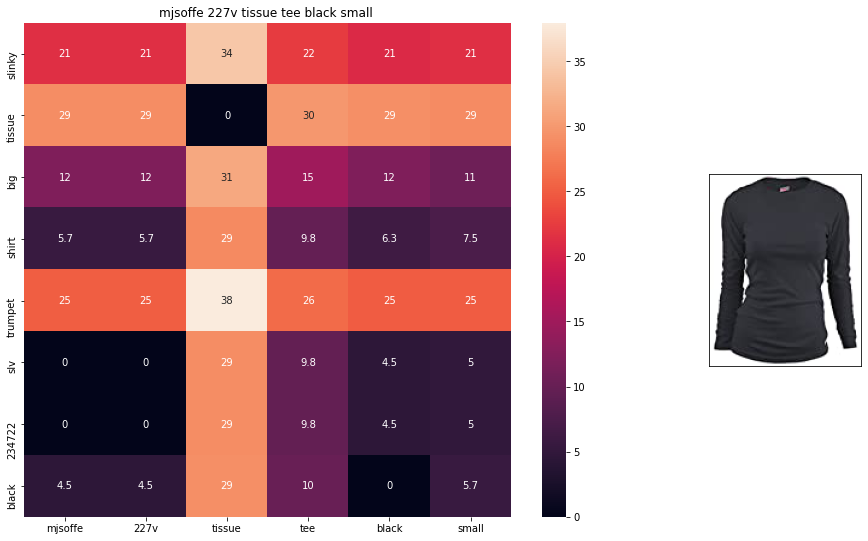

ASIN : B001CEVA7U
Brand : MJ Soffe
euclidean distance from input : 5.141599


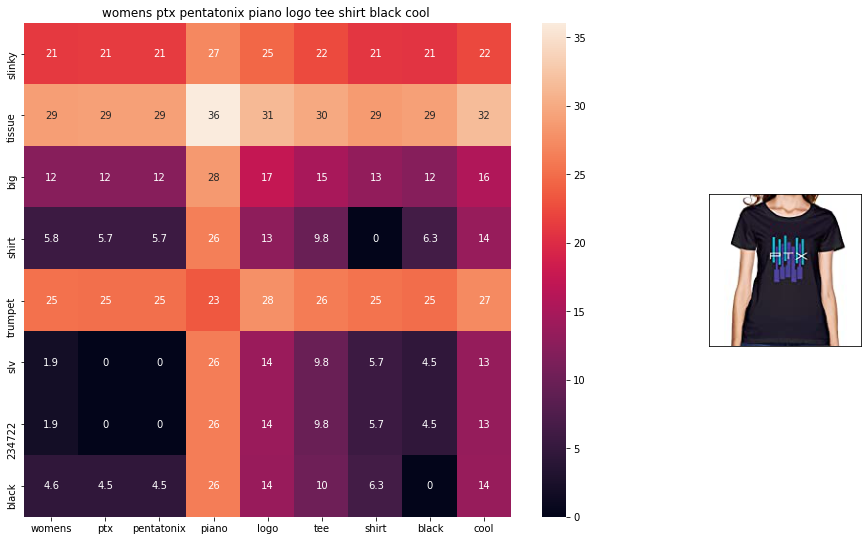

ASIN : B01JLSSLWA
Brand : LEEMASTER
euclidean distance from input : 5.4816923


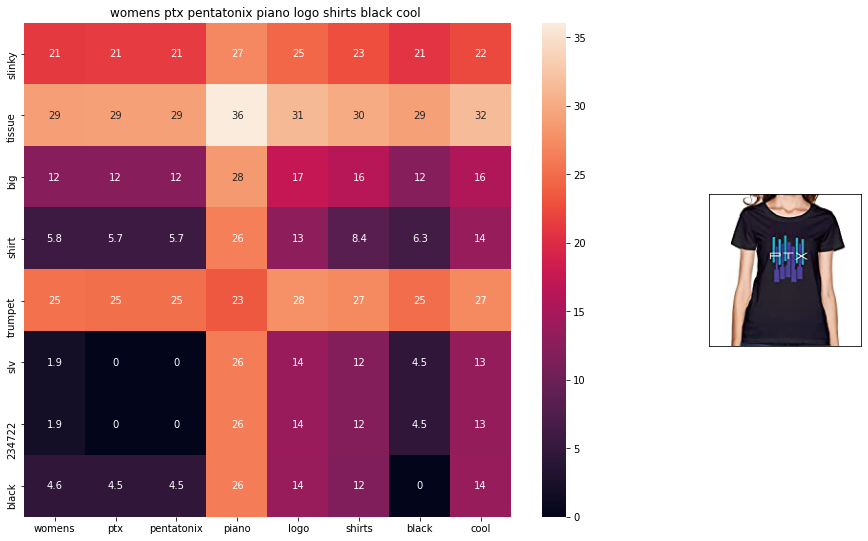

ASIN : B01JLSSCRY
Brand : LEEMASTER
euclidean distance from input : 5.530847


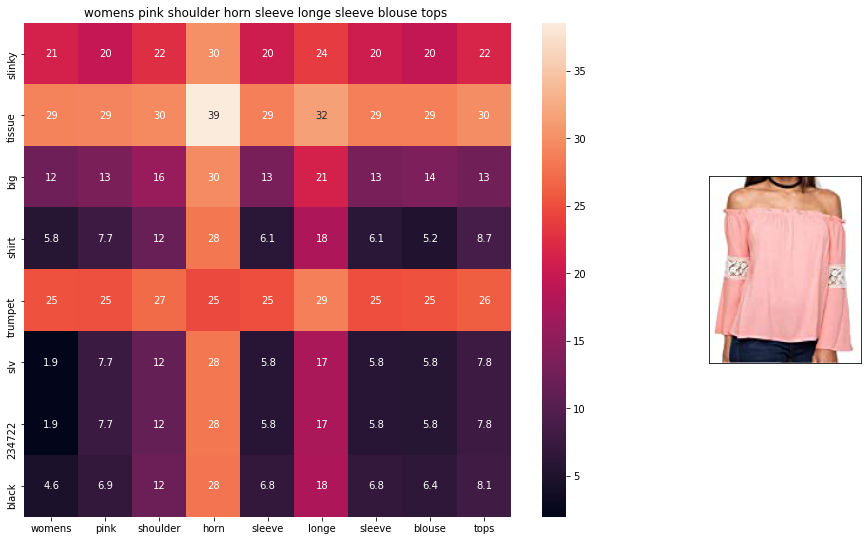

ASIN : B01LXLVP3J
Brand : ouwoow
euclidean distance from input : 5.5817986


ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (8).

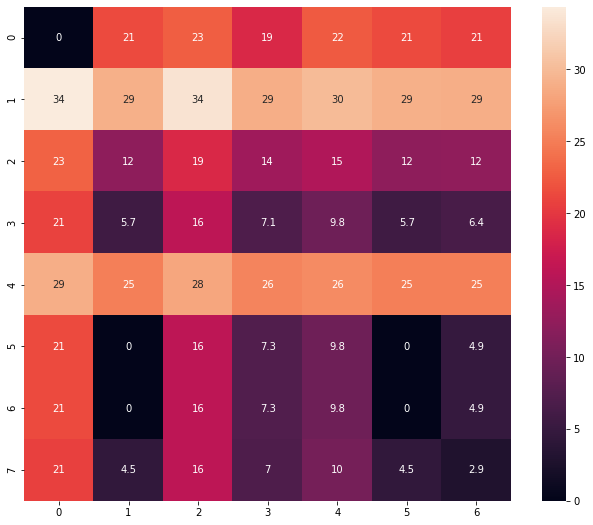

In [41]:
def weighted_w2v_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    pairwise_dist = pairwise_distances(w2v_title_weight, w2v_title_weight[doc_id].reshape(1,-1))

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    
    for i in range(0, len(indices)):
        heat_map_w2v(data['title'].loc[df_indices[0]],data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], indices[0], indices[i], 'weighted')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('Brand :',data['brand'].loc[df_indices[i]])
        print('euclidean distance from input :', pdists[i])
        print('='*125)

weighted_w2v_model(12566, 20)
#931
#12566
# in the give heat map, each cell contains the euclidean distance between words i, j

### [4.4] Weighted similarity using brand and color

In [42]:
# some of the brand values are empty. 
# Need to replace Null with string "NULL"
data['brand'].fillna(value="Not given", inplace=True )

# replace spaces with hypen
brands = [x.replace(" ", "-") for x in data['brand'].values]
types = [x.replace(" ", "-") for x in data['product_type_name'].values]
colors = [x.replace(" ", "-") for x in data['color'].values]

brand_vectorizer = CountVectorizer()
brand_features = brand_vectorizer.fit_transform(brands)

type_vectorizer = CountVectorizer()
type_features = type_vectorizer.fit_transform(types)

color_vectorizer = CountVectorizer()
color_features = color_vectorizer.fit_transform(colors)

extra_features = hstack((brand_features, type_features, color_features)).tocsr()

In [43]:
def heat_map_w2v_brand(sentance1, sentance2, url, doc_id1, doc_id2, df_id1, df_id2, model):
    
    # sentance1 : title1, input apparel
    # sentance2 : title2, recommended apparel
    # url: apparel image url
    # doc_id1: document id of input apparel
    # doc_id2: document id of recommended apparel
    # df_id1: index of document1 in the data frame
    # df_id2: index of document2 in the data frame
    # model: it can have two values, 1. avg 2. weighted
    
    #s1_vec = np.array(#number_of_words_title1 * 300), each row is a vector(weighted/avg) of length 300 corresponds to each word in give title
    s1_vec = get_word_vec(sentance1, doc_id1, model)
    #s2_vec = np.array(#number_of_words_title2 * 300), each row is a vector(weighted/avg) of length 300 corresponds to each word in give title
    s2_vec = get_word_vec(sentance2, doc_id2, model)
    
    # s1_s2_dist = np.array(#number of words in title1 * #number of words in title2)
    # s1_s2_dist[i,j] = euclidean distance between words i, j
    s1_s2_dist = get_distance(s1_vec, s2_vec)
   
    data_matrix = [['Asin','Brand', 'Color', 'Product type'],
               [data['asin'].loc[df_id1],brands[doc_id1], colors[doc_id1], types[doc_id1]], # input apparel's features
               [data['asin'].loc[df_id2],brands[doc_id2], colors[doc_id2], types[doc_id2]]] # recommonded apparel's features
    
    colorscale = [[0, '#1d004d'],[.5, '#f2e5ff'],[1, '#f2e5d1']] # to color the headings of each column 
    
    # we create a table with the data_matrix
    table = ff.create_table(data_matrix, index=True, colorscale=colorscale)
    # plot it with plotly
    plotly.offline.iplot(table, filename='simple_table')
    
    # devide whole figure space into 25 * 1:10 grids
    gs = gridspec.GridSpec(25, 15)
    fig = plt.figure(figsize=(25,5))
    
    # in first 25*10 grids we plot heatmap
    ax1 = plt.subplot(gs[:, :-5])
    # ploting the heap map based on the pairwise distances
    ax1 = sns.heatmap(np.round(s1_s2_dist,6), annot=True)
    # set the x axis labels as recommended apparels title
    ax1.set_xticklabels(sentance2.split())
    # set the y axis labels as input apparels title
    ax1.set_yticklabels(sentance1.split())
    # set title as recommended apparels title
    ax1.set_title(sentance2)

    # in last 25 * 10:15 grids we display image
    ax2 = plt.subplot(gs[:, 10:16])
    # we dont display grid lins and axis labels to images
    ax2.grid(False)
    ax2.set_xticks([])
    ax2.set_yticks([])
    
    # pass the url it display it
    display_img(url, ax2, fig)
    
    plt.show()

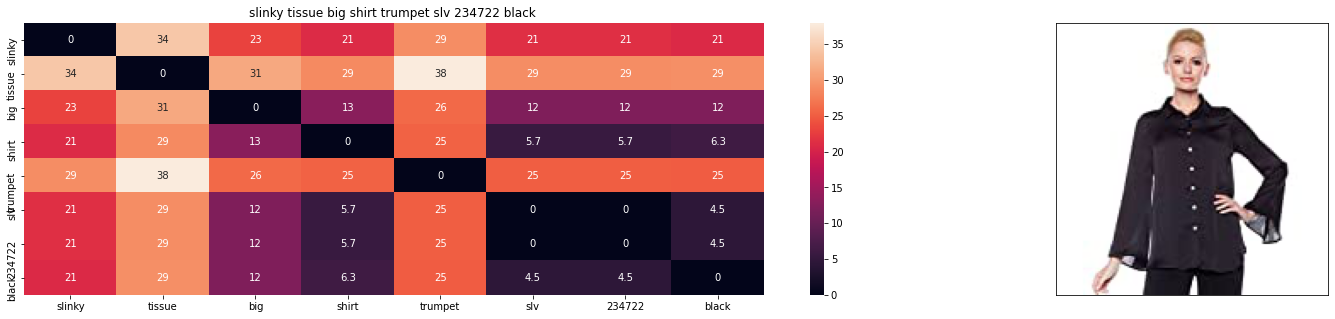

ASIN : B074LX1PSD
Brand : Slinky
euclidean distance from input : 0.0


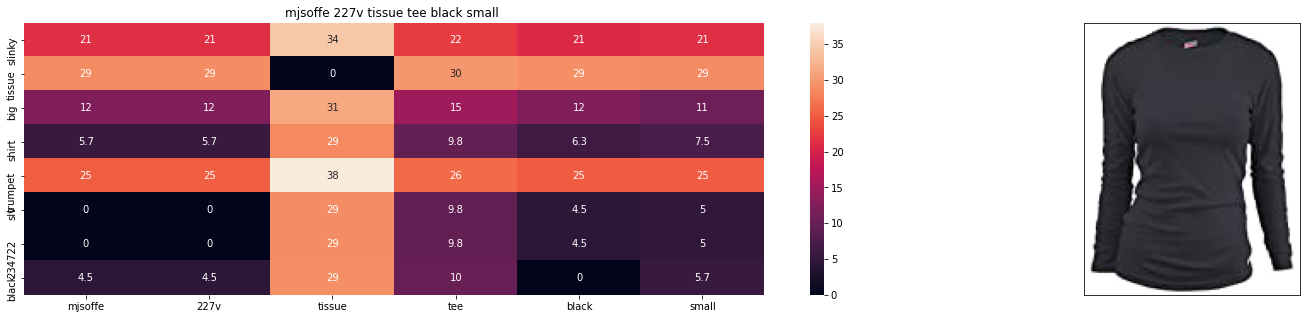

ASIN : B001CEVA7U
Brand : MJ Soffe
euclidean distance from input : 3.4368250406252585


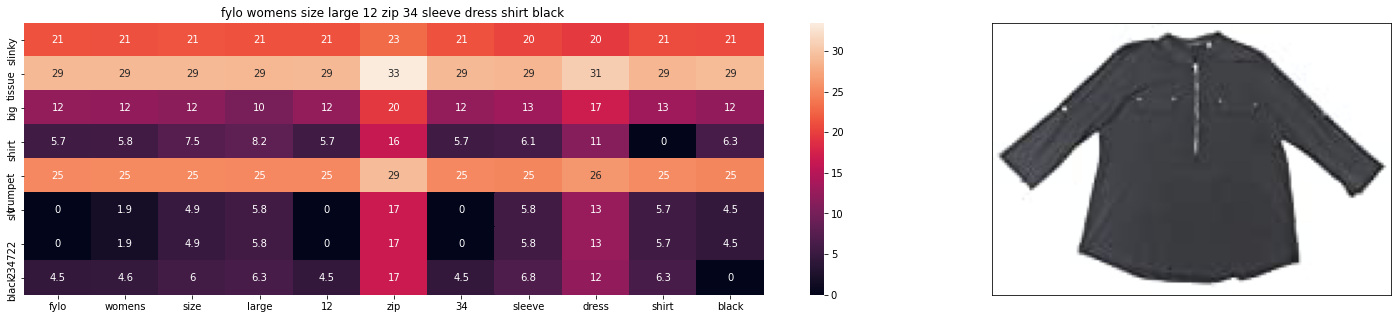

ASIN : B0718Y9J4M
Brand : f
euclidean distance from input : 3.4916122436523436


ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (8).

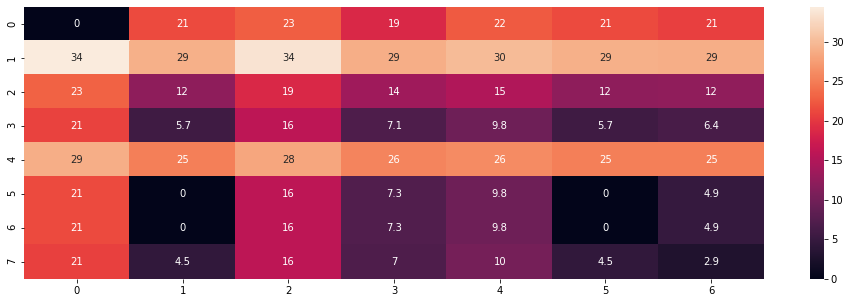

In [44]:
def idf_w2v_brand(doc_id, w1, w2, num_results):
    # doc_id: apparel's id in given corpus
    # w1: weight for  w2v features
    # w2: weight for brand and color features

    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    idf_w2v_dist  = pairwise_distances(w2v_title_weight, w2v_title_weight[doc_id].reshape(1,-1))
    ex_feat_dist = pairwise_distances(extra_features, extra_features[doc_id])
    pairwise_dist   = (w1 * idf_w2v_dist +  w2 * ex_feat_dist)/float(w1 + w2)

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    

    for i in range(0, len(indices)):
        heat_map_w2v_brand(data['title'].loc[df_indices[0]],data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], indices[0], indices[i],df_indices[0], df_indices[i], 'weighted')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('Brand :',data['brand'].loc[df_indices[i]])
        print('euclidean distance from input :', pdists[i])
        print('='*125)

idf_w2v_brand(12566, 5, 5, 20)
# in the give heat map, each cell contains the euclidean distance between words i, j

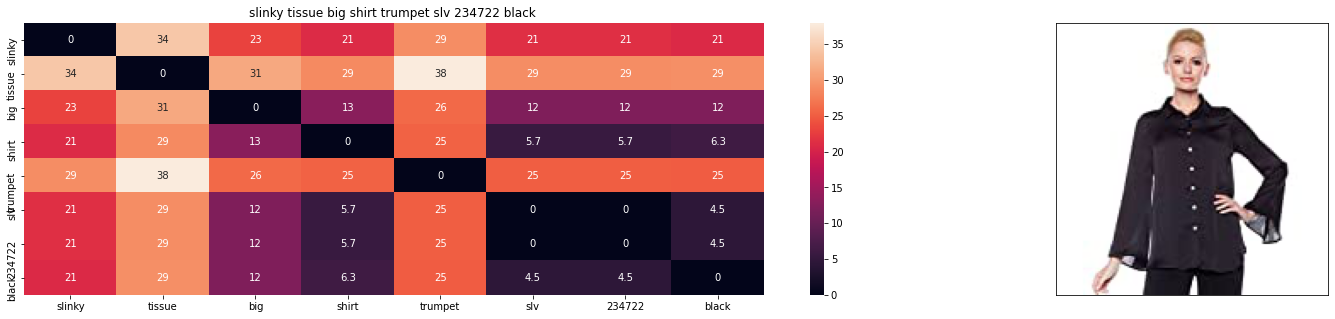

ASIN : B074LX1PSD
Brand : Slinky
euclidean distance from input : 0.0


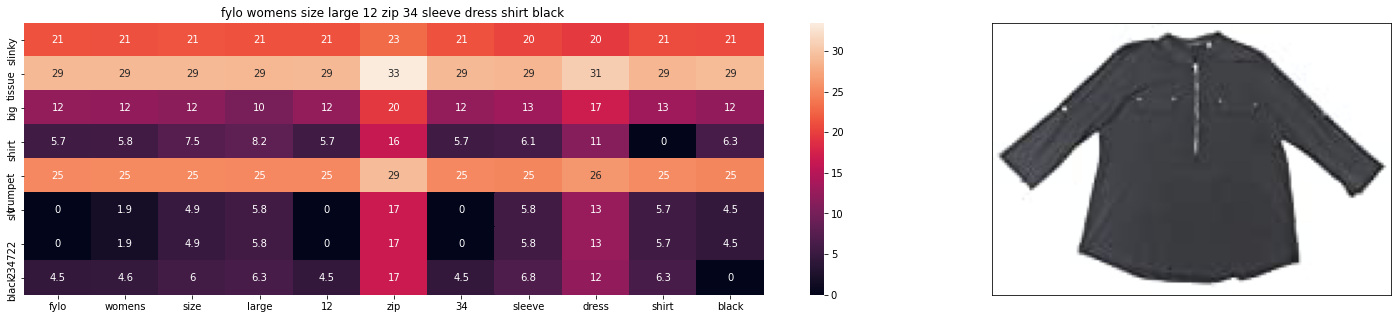

ASIN : B0718Y9J4M
Brand : f
euclidean distance from input : 1.4530204079367899


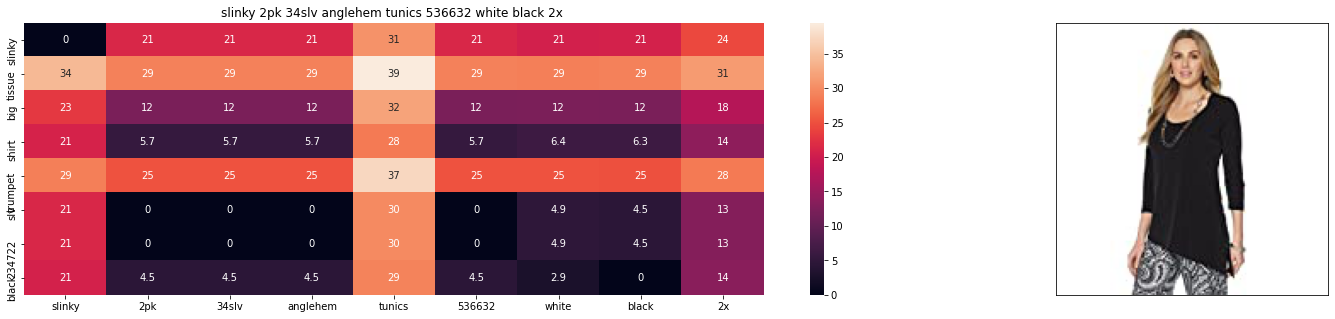

ASIN : B0759TNKJF
Brand : Slinky
euclidean distance from input : 1.4618714766068892


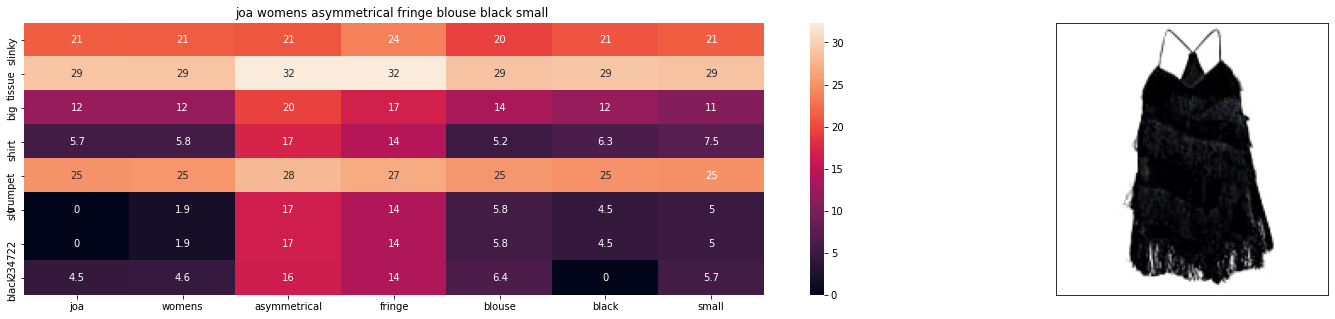

ASIN : B0721ZGF6S
Brand : J.O.A.
euclidean distance from input : 1.4737238450483843


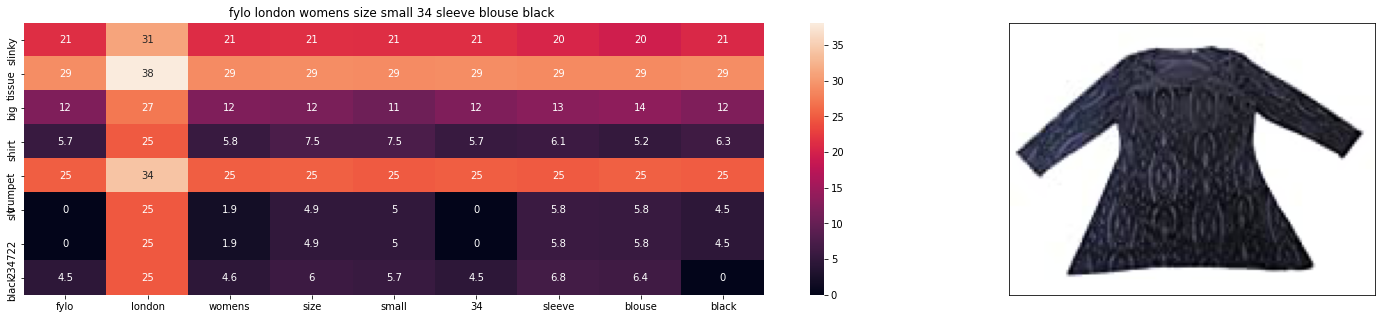

ASIN : B073HJRP1D
Brand : f
euclidean distance from input : 1.5034992564808238


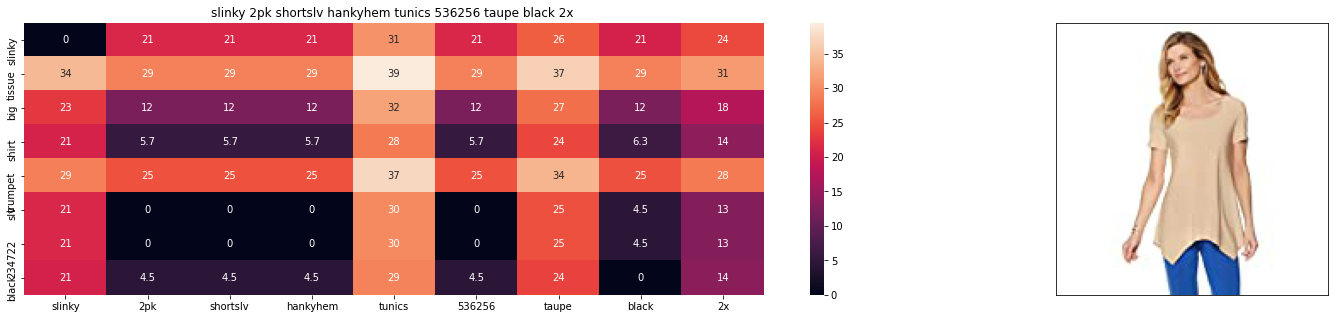

ASIN : B0759ZHGWZ
Brand : Slinky
euclidean distance from input : 1.536627960205078


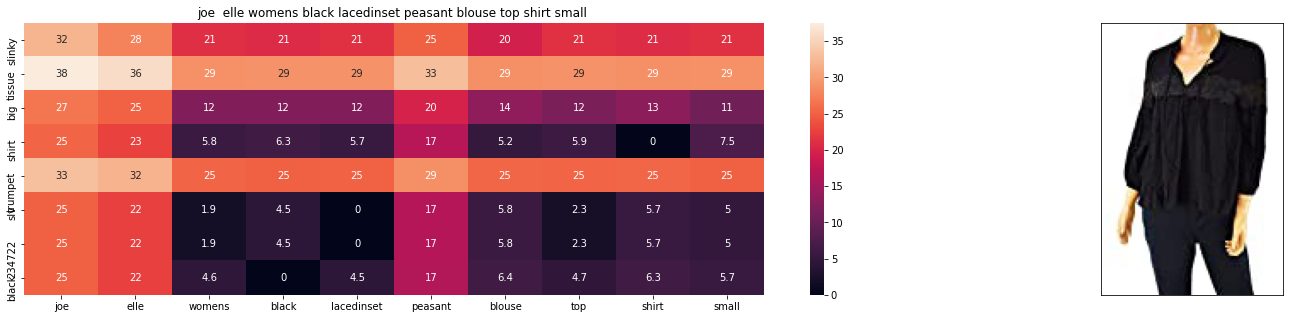

ASIN : B073GDVFT2
Brand : J&E
euclidean distance from input : 1.5423985567959873


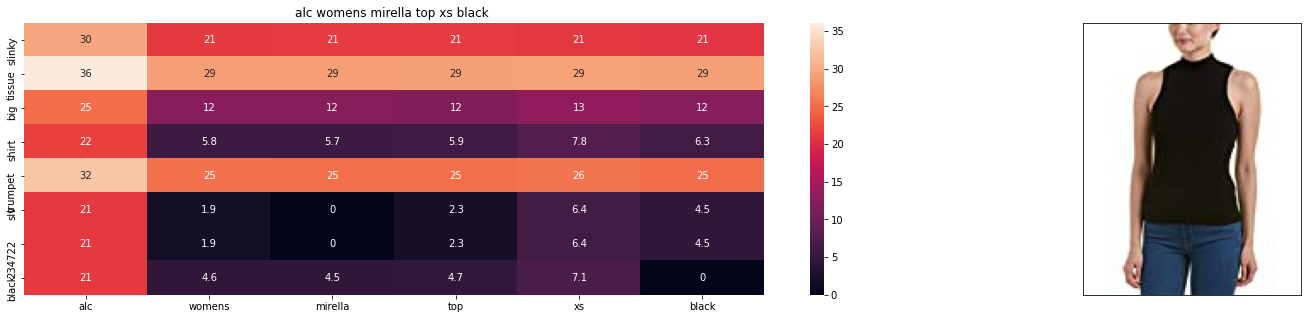

ASIN : B072N8CS7N
Brand : A.L.C.
euclidean distance from input : 1.5907797379927202


ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (8).

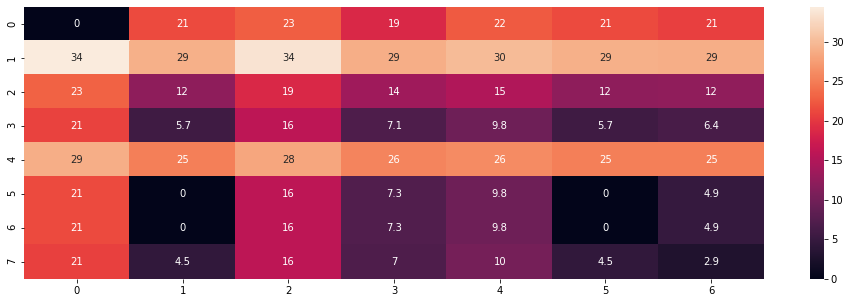

In [45]:
# brand and color weight =50
# title vector weight = 5

idf_w2v_brand(12566, 5, 50, 20)